#<B> <CENTER>  PROYECTO INTEGRADOR </B></CENTER>





### <B> ETAPA 1: ENTENDIMIENTO CONTEXTUAL DEL PROYECTO A DESARROLLAR

En esta etapa planteamos el contexto del problema, los objetivos del proyecto y definir las variables y tipo de variables a utilizar.

 - <b>El problema:</b> En el caso de estudio, se indica que el problema es la identificación de células cancerígenas, a través de la descripción de características del núcleo celular obtenida de una imagen digital mamaria. Por tanto, la variable objetivo es "Diagnosis". Las demás variables se describen de la siguiente manera:

    - <B>id:</B> número de indetificación.
    - <B>radius_mean:</B> promedio de las distancias desde el centro del núcleo celular hasta los puntos del perìmetro.
    - <B>texture_mean:</B> promedio de los valores de la escala de grises.
    - <B>perimeter_mean:</B> promedio del perimetro.
    - <B>area_mean:</B> promedio del área.
    - <B>smoothness_mean:</B> promedio de la variación local en longitudes de radio.
    - <B>compactness_mean:</B> promedio de la compacidad.
    - <B>concavity_mean:</B> promedio de la severidad de las porciones cóncavas del contorno.
    - <b>concave points_mean</b> promedio de la cantidad de las porciones cóncavas del contorno.
    - <b>symmetry_mean:</b> promedio de la simetría.
    - <b>fractal_dimension_mean:</b> promedio de la dimensión fractal.
    - <b>radius_se:</b> desviación estándar de las distancias desde el centro del núcleo celular hasta los puntos del perìmetro.
    - <b>texture_se:</b> desviación estándar de los valores de la escala de grises.
    - <b>perimeter_se:</b> desviación estándar del perimetro.
    - <b>area_se:</b> desviación estándar del área.
    - <b>moothness_se:</b> desviación estándar de la variación local en longitudes de radio.
    - <b>compactness_se:</b> desviación estándar de la compacidad.
    - <b>concavity_se:</b> desviación estándar de la severidad de las porciones cóncavas del contorno.
    - <b>concave points_se:</b> desviación estándar de la cantidad de las porciones cóncavas del contorno.
    - <b>symmetry_se:</b> desviación estándar de la simetría.
    - <b>fractal_dimension_se:</b> desviación estándar de la dimensión fractal.
    - <b>radius_worst:</b> promedio de los 3 valores más altos de las distancias desde el centro del núcleo celular hasta los puntos del perìmetro.
    - <b>texture_worst:</b> promedio de los 3 valores más altos de la escala de grises.
    - <b>perimeter_worst:</b> promedio de los 3 valores más altos del perimetro.
    - <b>area_worst:</b> promedio de los 3 valores más altos del área.
    - <b>smoothness_worst:</b> promedio de los 3 valores más altos de la variación local en longitudes de radio.
    - <b>compactness_worst:</b> promedio de los 3 valores más altos de la compacidad.
    - <b>concavity_worst:</b> promedio de los 3 valores más altos de la severidad de las porciones cóncavas del contorno.
    - <b>concave points_worst:</b> promedio de los 3 valores más altos de la cantidad de las porciones cóncavas del contorno.
    - <b>symmetry_worst:</b> promedio de los 3 valores más altos de la simetría.
    - <b>fractal_dimension_worst:</b> promedio de los 3 valores más altos de la dimensión fractal.
      

    





- <b>Objetivo del proyecto:</b> identificar la presencia de células cencerígenas, usando un modelo de Machine Learning.

- <b>Población objetivo:</b> 569 imagenes digitales mamarias, obteniendose características de núcleos celulares de las pacientes.

In [ ]:
# Librería Generales
import pandas as pd                                    
import numpy as np                                    
import matplotlib.pyplot as plt                      
import seaborn as sns                                
from scipy import stats                      
from sklearn import metrics
from sklearn import preprocessing


## Librerías de Preparación y Transformación de Datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


## Librerías de Modelos de Machine Learning
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Librerías de Métricas de Validación
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve              
from sklearn.metrics import f1_score

## Librerías de Validación Cruzada
from sklearn.model_selection import KFold               
from sklearn.model_selection import cross_val_score  

## Librerías Auxiliares
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive          

In [ ]:
plt.style.use('ggplot')

In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#IMPORTAR DATASET

#df = pd.read_csv("/content/drive/MyDrive/brast-cancer-dataset.csv")
df = pd.read_csv("drive/My Drive/GRUPO_ESPECIALIZACION/brast-cancer-dataset.csv")
#"https://docs.google.com/spreadsheets/d/1iIYcz1s2zmqarC7-hKCTspwNjwOm5Nk1xsv-FTdr8_8/export?format=csv" exportado desde DMC

In [ ]:
#MOSTRAR LAS 5 PRIMERAS MUESTRAS DE LA DATA
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#MOSTRAR 5 MUESTRAS ALEATORIAS DE LA DATA
df.sample(5, random_state = 2000)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.4450,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
145,869476,B,11.90,14.65,78.11,432.8,0.11520,0.12960,0.03710,0.03003,0.1995,0.07839,0.3962,0.6538,3.0210,25.03,0.010170,0.04741,0.02789,0.011100,0.03127,0.009423,13.15,16.51,86.26,509.6,0.1424,0.2517,0.0942,0.06042,0.2727,0.10360,NaN
336,897604,B,12.99,14.23,84.08,514.3,0.09462,0.09965,0.03738,0.02098,0.1652,0.07238,0.1814,0.6412,0.9219,14.41,0.005231,0.02305,0.03113,0.007315,0.01639,0.005701,13.72,16.91,87.38,576.0,0.1142,0.1975,0.1450,0.05850,0.2432,0.10090,NaN
233,88206102,M,20.51,27.81,134.40,1319.0,0.09159,0.10740,0.15540,0.08340,0.1448,0.05592,0.5240,1.1890,3.7670,70.01,0.005020,0.02062,0.03457,0.010910,0.01298,0.002887,24.47,37.38,162.70,1872.0,0.1223,0.2761,0.4146,0.15630,0.2437,0.08328,NaN
23,851509,M,21.16,23.04,137.20,1404.0,0.09428,0.10220,0.10970,0.08632,0.1769,0.05278,0.6917,1.1270,4.3030,93.99,0.004728,0.01259,0.01715,0.010380,0.01083,0.001987,29.17,35.59,188.00,2615.0,0.1401,0.2600,0.3155,0.20090,0.2822,0.07526,NaN


### <B> ETAPA 2: PREPARACIÓN Y VALOR AGREGADO DE LOS DATOS <B>

En esta etapa revisamos la data y la estructura de la información.

In [ ]:
# NÚMERO DE FILAS Y CANTIDAD DE VARIABLES
df.shape

(569, 33)

Echamos un vistazo a las columnas.

In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
# MOSTRAR INFORMACIÓN GENERAL DEL DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

> Podemos extraer principalmente 3 cosas

> - El dataset cuenta con 32 variables 

> - No hay ningún dato de tipo nulo explícitamente en las características o variables

> - La variable ID es distinta para cada muestra, y no aporta realmente a la variable objetivo siendo una clase para cada muestra. Lógicamente tampoco tienen correlación con el tipo de tumor diagnosticado en un paciente con cancer de mama.






In [ ]:
# CORTAMOS LA VARIABLE ID, LA CUÁL NO APORTA REALMENTE A CUMPLIR NUESTRA META
df = df.drop(columns = ['id', 'Unnamed: 32'])
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


###<B> ETAPA 3: EXÁMEN GRÁFICO Y DESCRIPTIVO NUMÉRICO </B>


---



  ### <b> 3.1  DESCRIPTIVO NUMÉRICO DEL DATASET</b>

  ### <b> 3.1  ANÁLISIS UNIVARIADO: 'DIAGNOSIS'</b>



Estableciendo que el target o variable objetivo es el diagnóstico del tumor (Benigno o maligno).

In [ ]:
# HALLAR EL NÚMERO DE TUMORES BENIGNOS MUESTREADOS
countBenigno = df['diagnosis'][df['diagnosis'] == 'B'].shape[0]
countMaligno = df['diagnosis'][df['diagnosis'] == 'M'].shape[0]
print(f'En la data están muestreadas {countBenigno} tumores benignos')
print(f'En la data están muestreadas {countMaligno} tumores malignos')

En la data están muestreadas 357 tumores benignos
En la data están muestreadas 212 tumores malignos


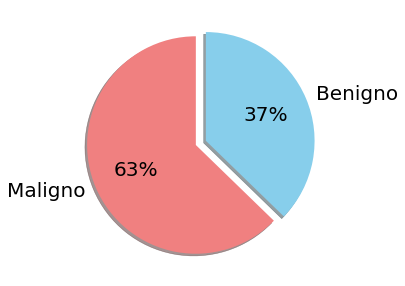

In [ ]:
# GRAFICAR PORCENTAJE DE MUESTRAS QUE REPRESENTAN LAS CLASES DE TUMORES
plt.figure(figsize = (5,5))
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=20
plt.pie(df['diagnosis'].value_counts(), labels = ["Maligno", "Benigno"], colors = ['lightcoral','skyblue'], startangle = 90, shadow = True, explode = (0.05, 0.05), autopct='%1.0f%%', radius =1)
plt.show()

Se observa que tan balanceado están los datos respecto al target


---







  ### <b> 3.2  ANÁLISIS UNIVARIADO: VARIABLES EXPLICATIVAS</b>

In [ ]:
# OBTENEMOS LOS ESTADÍSTICOS BÁSICOS DE CADA VARIABLE DENTRO DEL DATASET
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# CREAMOS UN DATAFRAME CON SOLO LAS VARIABLES CUANTITATIVAS (EN ESTE CASO, SIN LA VARIABLE OBJETIVO)
dfCuantitativa = df.drop(columns = ['diagnosis'])
dfCuantitativa

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


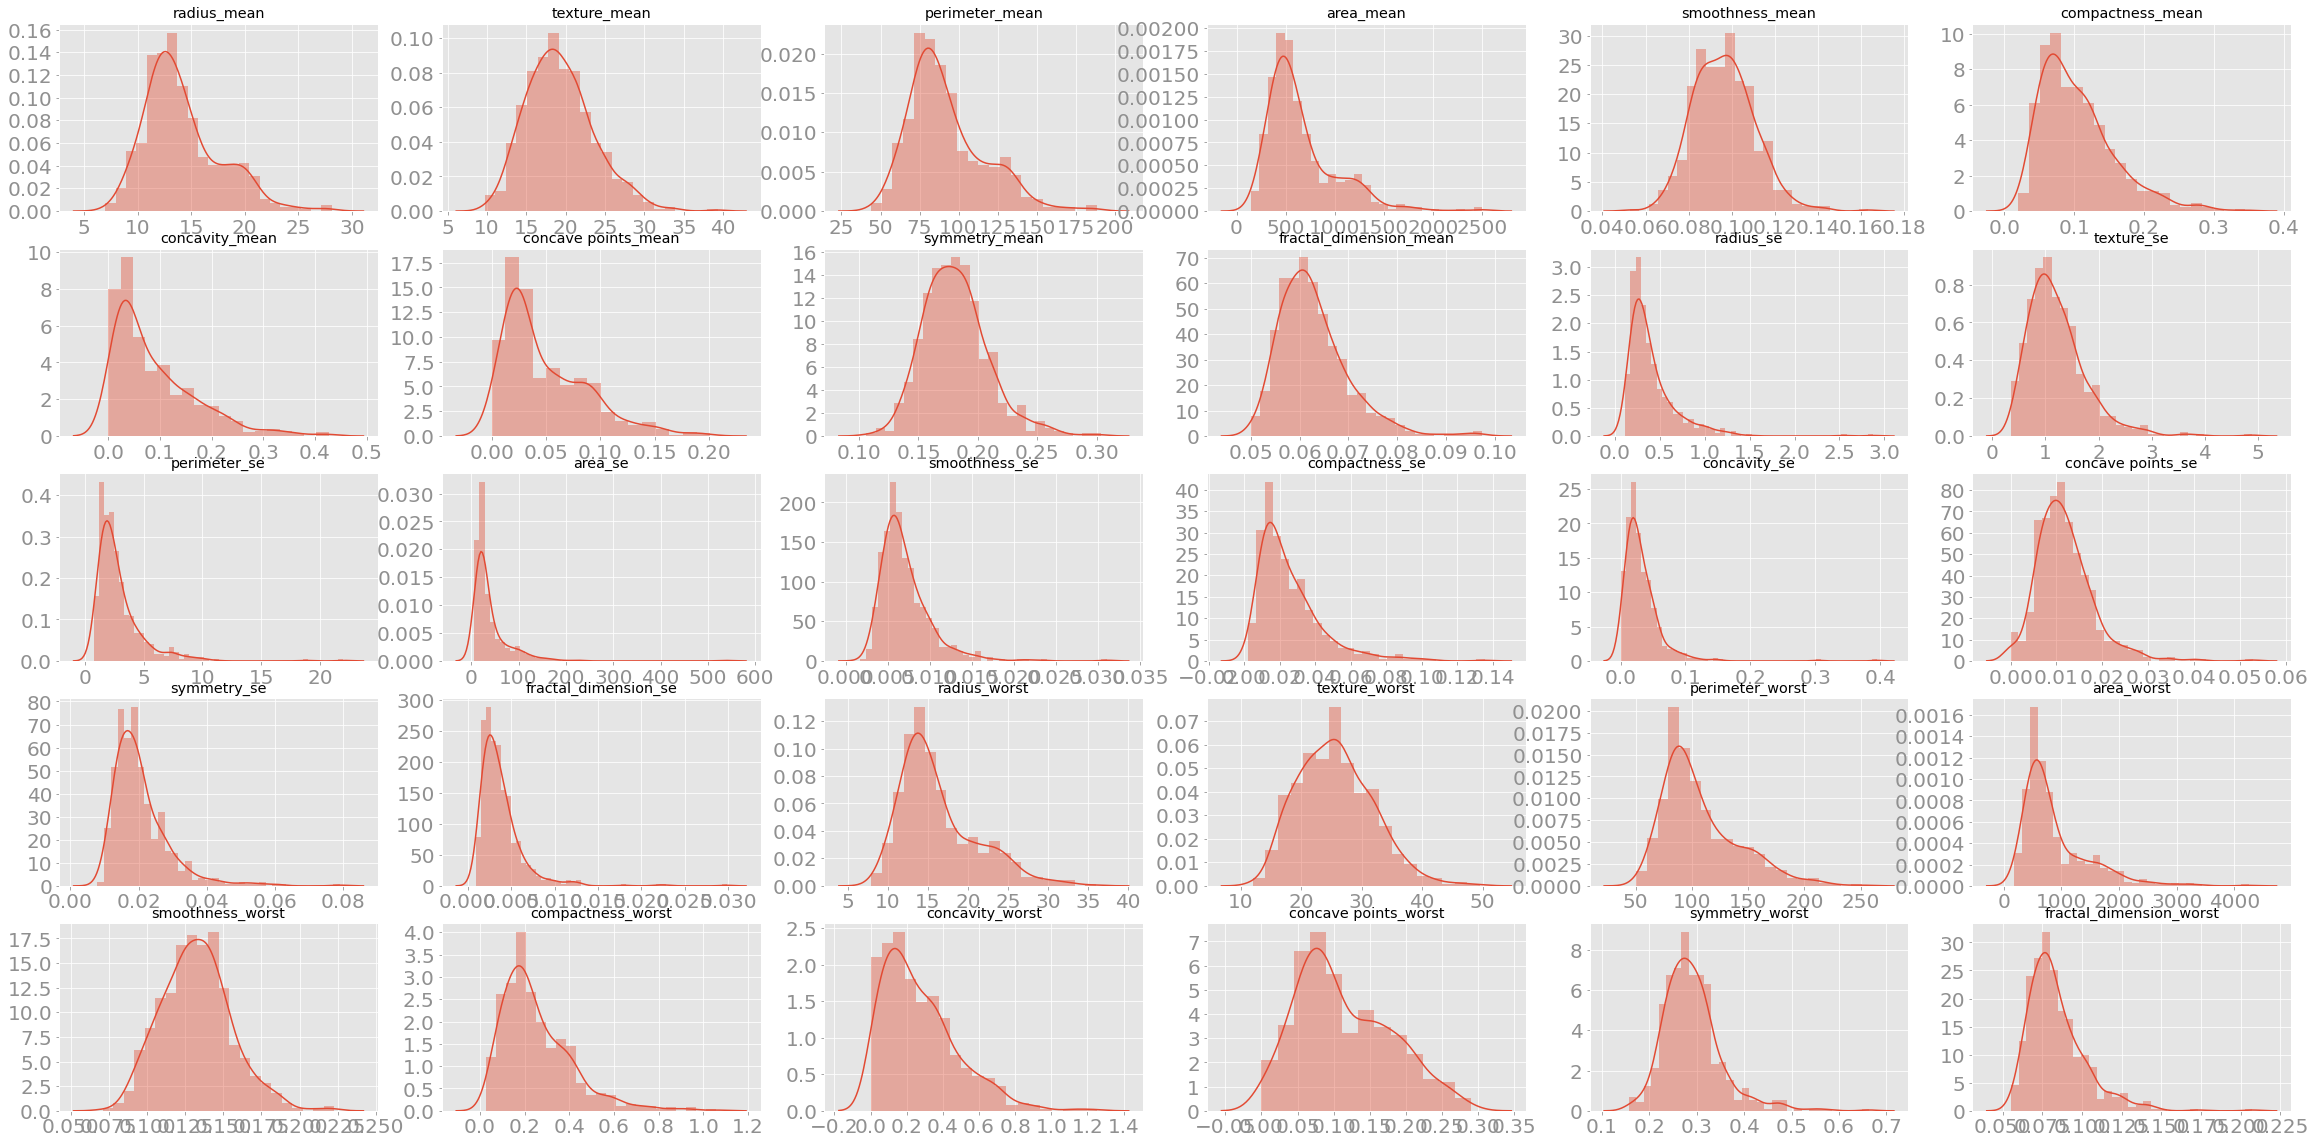

In [ ]:
# GRAFICA LOS HISTOGRAMAS Y LA DISTRIBUCIÓN QUE CONFORMAN LAS DISTINTAS VARIABLES CUANTITATIVAS

variablesCuantitativas = dfCuantitativa.columns.values.tolist()

fig, axs = plt.subplots(5,6, figsize = (40,20))
plt.rcParams['font.size'] = 10

j = 0
k = -1
for variableCuantitativa in variablesCuantitativas:
  if k >= 5:
    k = 0
    j += 1
  else:
    k += 1
  sns.distplot(dfCuantitativa.loc[:,variableCuantitativa], ax = axs[j,k], label = None).set_title(variableCuantitativa)
  axs[j,k].set(xlabel=None, ylabel = None)

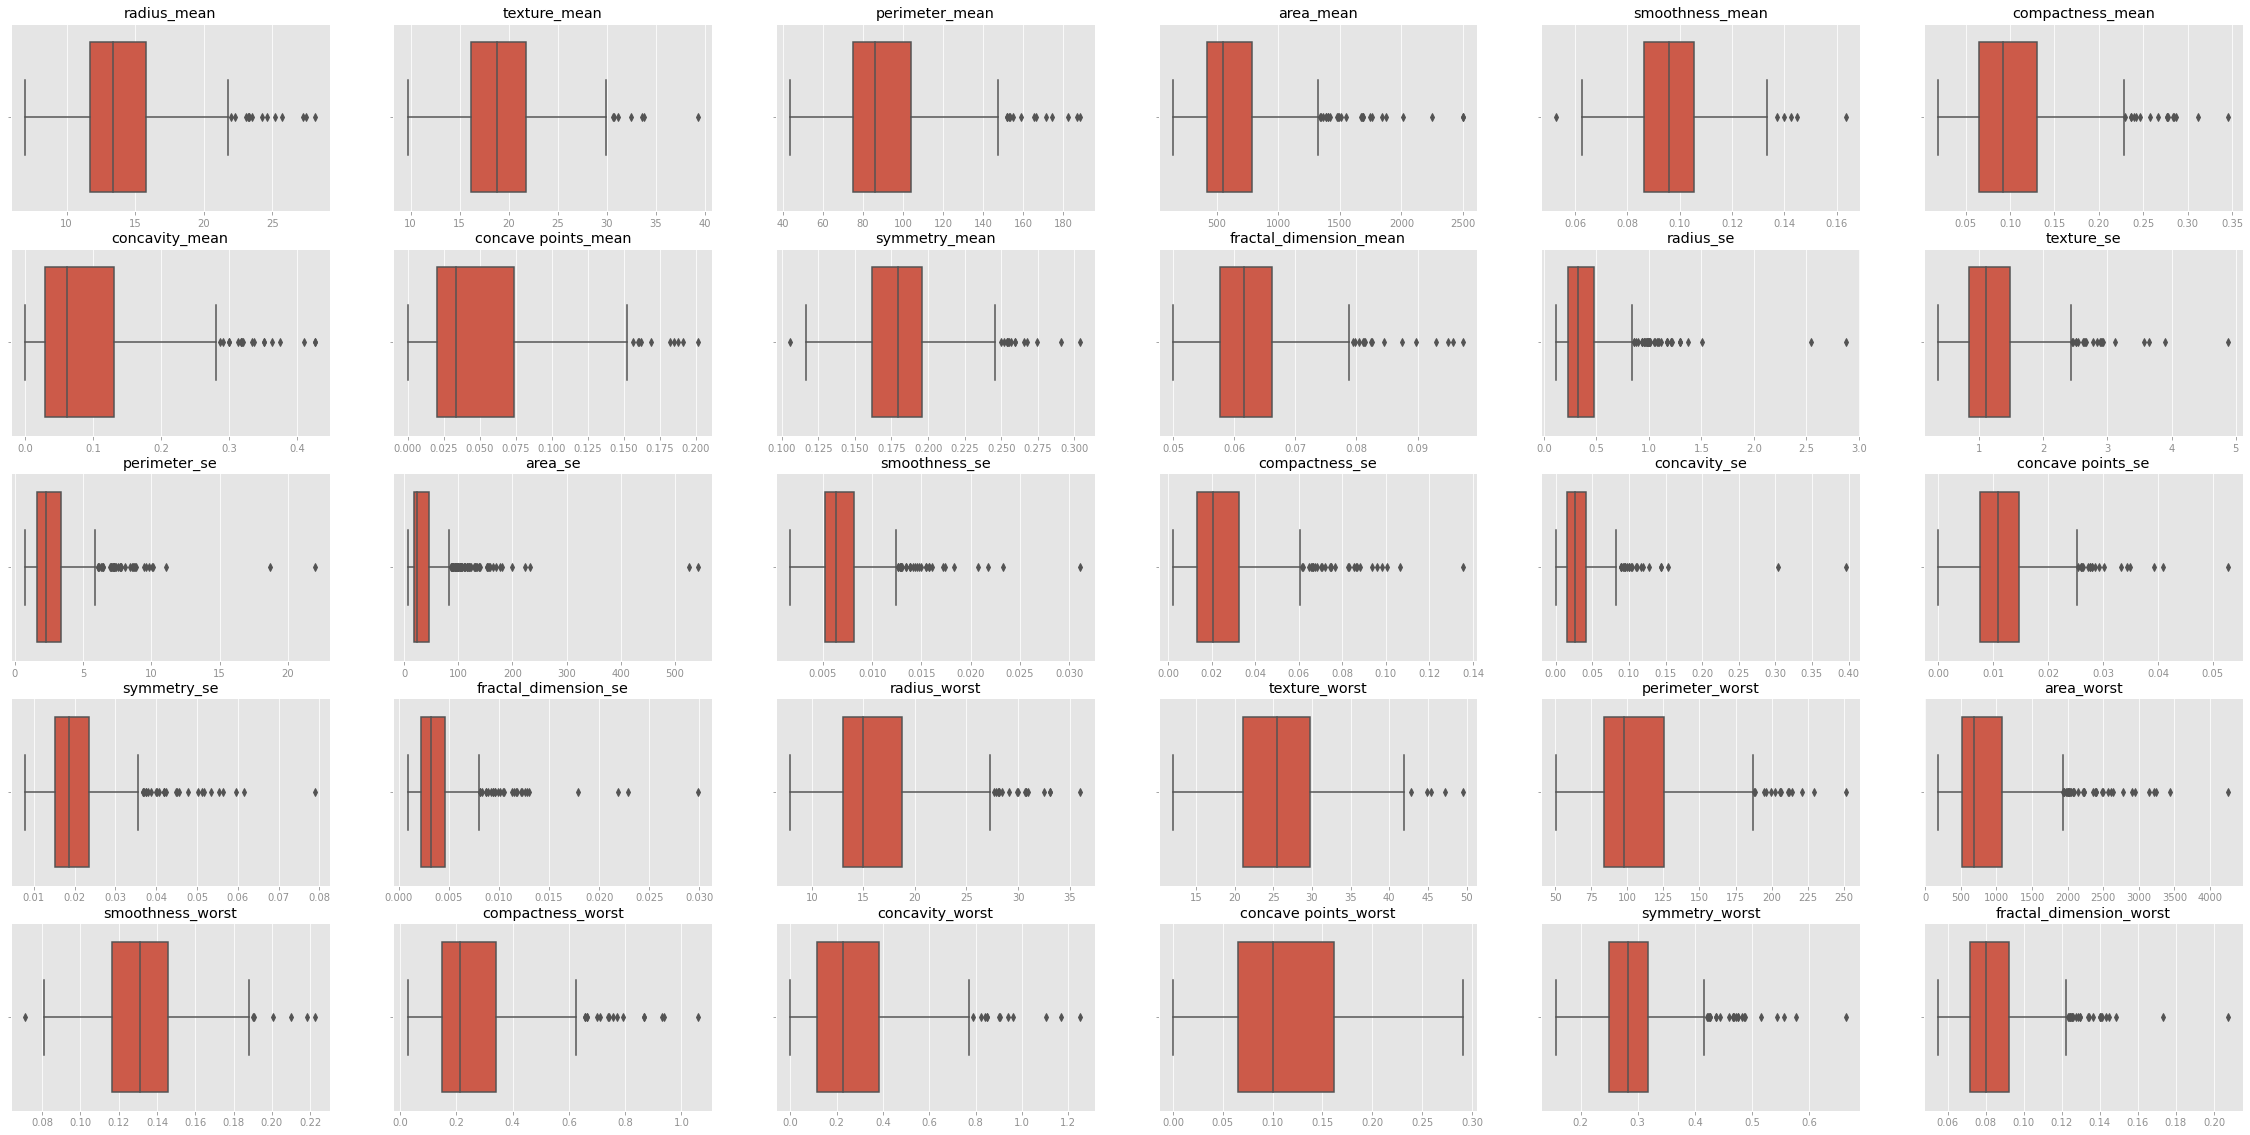

In [ ]:
# GRAFICA LOS BOXPLOT DE LAS DISTINTAS VARIABLES CUANTITATIVAS
variablesCuantitativas = dfCuantitativa.columns.values.tolist()

fig, axs = plt.subplots(5,6, figsize = (40,20))
plt.rcParams['font.size'] = 10

j = 0
k = -1
for variableCuantitativa in variablesCuantitativas:
  if k >= 5:
    k = 0
    j += 1
  else:
    k += 1
  sns.boxplot(dfCuantitativa.loc[:,variableCuantitativa], ax = axs[j,k]).set_title(variableCuantitativa)
  axs[j,k].set(xlabel=None)

> Existen variables en las cuáles hay outliers o valores atípicos muy alejados del promedio, como lo demuestran las gráficas de distribución y boxplot.

> Estos serán tratados posteriormente, ya que es necesario decidir si las variables o las muestras atípicas deberían ser eliminadas.

  ### <b> 3.3  ANÁLISIS BIIVARIADO: RELACIÓN DE LA VARIABLE 'DIAGNOSIS' CON CADA VARIABLE EXPLICATIVA</b>

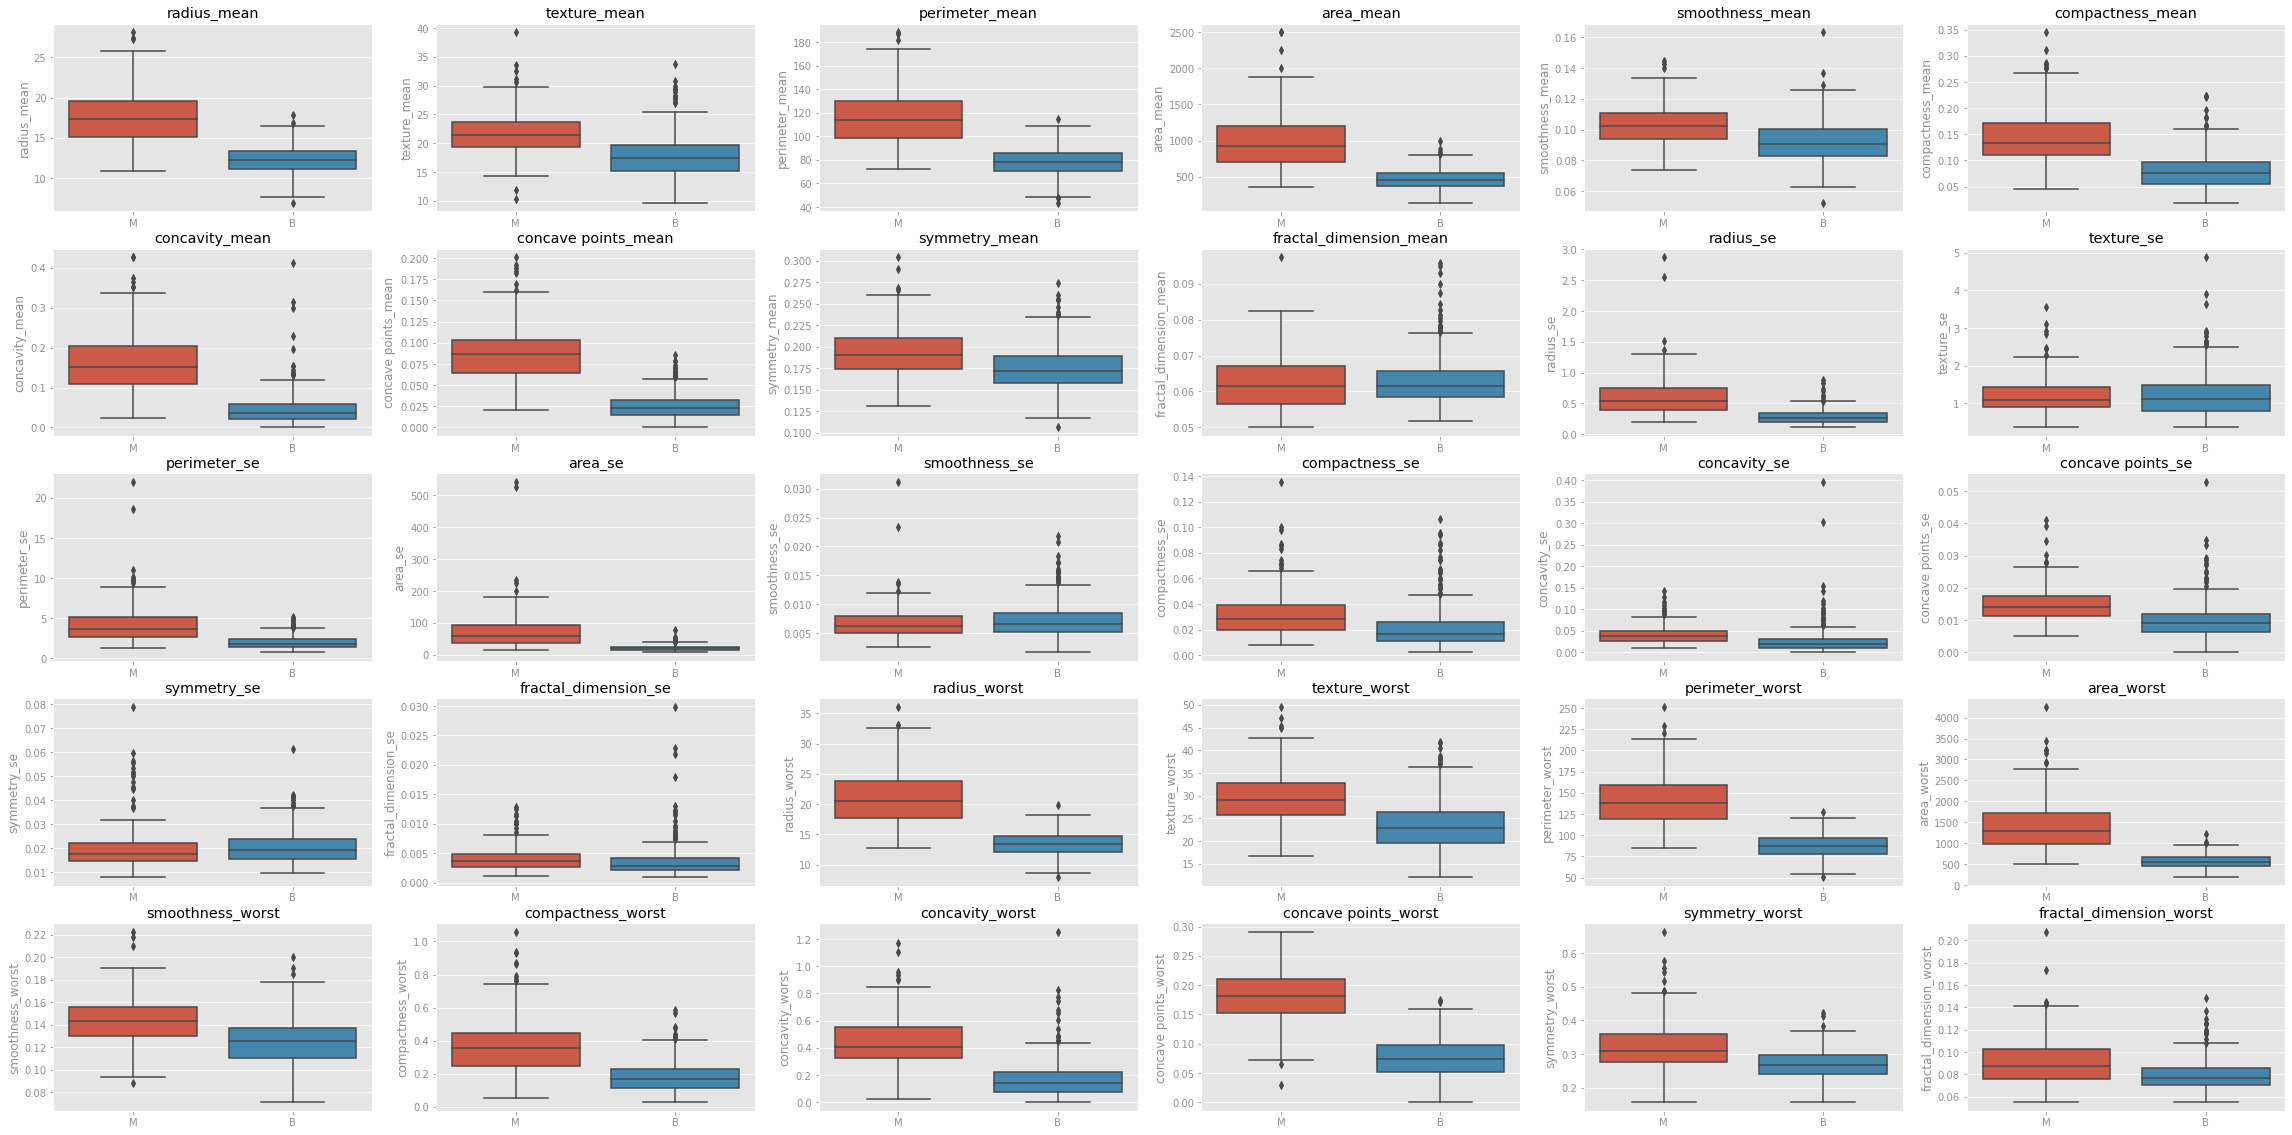

In [ ]:
# GRÁFICA DE DISTRIBUCIÓN EN FORMATO BOXPLOT RESPECTO AL TARGET
variablesCuantitativas = dfCuantitativa.columns.values.tolist()

fig, axs = plt.subplots(5,6, figsize = (40,20))
plt.rcParams['font.size'] = 10

j = 0
k = -1

target = 'diagnosis'

for variableCuantitativa in variablesCuantitativas:
  if k >= 5:
    k = 0
    j += 1
  else:
    k += 1
  sns.boxplot(x = df[target] , y = dfCuantitativa.loc[:,variableCuantitativa], ax = axs[j,k]).set_title(variableCuantitativa)
  axs[j,k].set(xlabel=None)

> De estas gráficas, podemos ver si existen variables que poseen promedios y desviaciones muy similares entre las clases B y M (benigno y maligno) de los tumores. Si fuese así, estas variables no aportarían de buena manera a la clasificación del tumor, ya que no podría presentar una diferencia para ello.


In [ ]:
#Se eliminan las siguientes variables independientes porque no tienen relación con la variable target.
dfCuantitativa = dfCuantitativa.drop(columns = ['fractal_dimension_mean'])
dfCuantitativa = dfCuantitativa.drop(columns = ['texture_se'])
dfCuantitativa = dfCuantitativa.drop(columns = ['smoothness_se'])
dfCuantitativa = dfCuantitativa.drop(columns = ['symmetry_se'])
dfCuantitativa = dfCuantitativa.drop(columns = ['fractal_dimension_se'])

## <B> ETAPA 4: ASOCIACIONES CUANTITATIVAS </B>


---

In [ ]:
# MATRIZ DE CORRELACIONES ENTRE LAS VARIABLES CUANTITATIVAS
corrMatrix = dfCuantitativa.corr(method= 'pearson')
corrMatrix


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,perimeter_se,area_se,compactness_se,concavity_se,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.679090,0.674172,0.735864,0.206000,0.194204,0.376169,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,0.275869,0.281673,0.259845,0.191975,0.143293,0.163851,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.691765,0.693135,0.744983,0.250744,0.228082,0.407217,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.732562,0.726628,0.800086,0.212583,0.207660,0.372320,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.301467,0.296092,0.246552,0.318943,0.248396,0.380676,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.497473,0.548905,0.455653,0.738722,0.570517,0.642262,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.631925,0.660391,0.617427,0.670279,0.691270,0.683260,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.698050,0.710650,0.690299,0.490424,0.439167,0.615634,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.303379,0.313893,0.223970,0.421659,0.342627,0.393298,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
radius_se,0.679090,0.275869,0.691765,0.732562,0.301467,0.497473,0.631925,0.698050,0.303379,1.000000,0.972794,0.951830,0.356065,0.332358,0.513346,0.715065,0.194799,0.719684,0.751548,0.141919,0.287103,0.380585,0.531062,0.094543,0.049559


(25.0, 0.0)

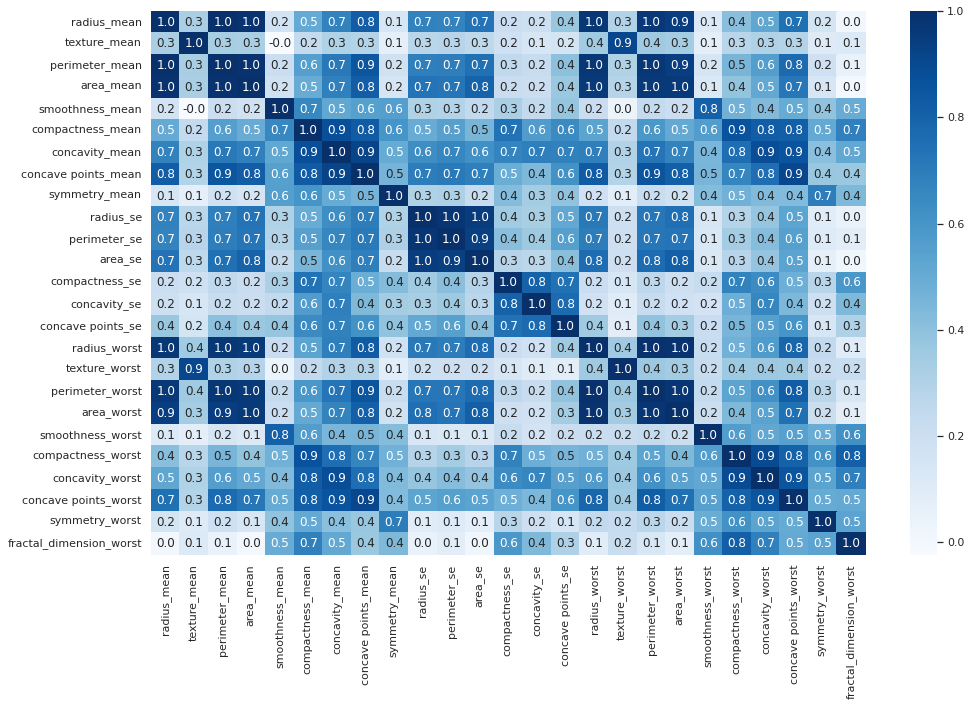

In [ ]:
sns.set(font_scale=1)
plt.figure(figsize=(16, 10))
ax = sns.heatmap(corrMatrix,annot=True, fmt=".1f",cmap="Blues") 
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))

> A partir de la matriz de correlación, podemos observar que variables tienen una alta dependencia entre ellas, y de esta manera eliminar alguna para evitar la multicolinealidad.

### <B> - ELIMINANDO CORRELACIONES DE 1.0 </B>

In [ ]:
#Se eliminan las siguientes variables para evitar multicolinealidad.
dfCuantitativa = dfCuantitativa.drop(columns = ['perimeter_mean'])
dfCuantitativa = dfCuantitativa.drop(columns = ['area_mean'])
dfCuantitativa = dfCuantitativa.drop(columns = ['radius_worst']) 
dfCuantitativa = dfCuantitativa.drop(columns = ['perimeter_worst'])
dfCuantitativa = dfCuantitativa.drop(columns = ['radius_se'])
dfCuantitativa = dfCuantitativa.drop(columns = ['area_se']) 
dfCuantitativa = dfCuantitativa.drop(columns = ['texture_worst'])

(18.0, 0.0)

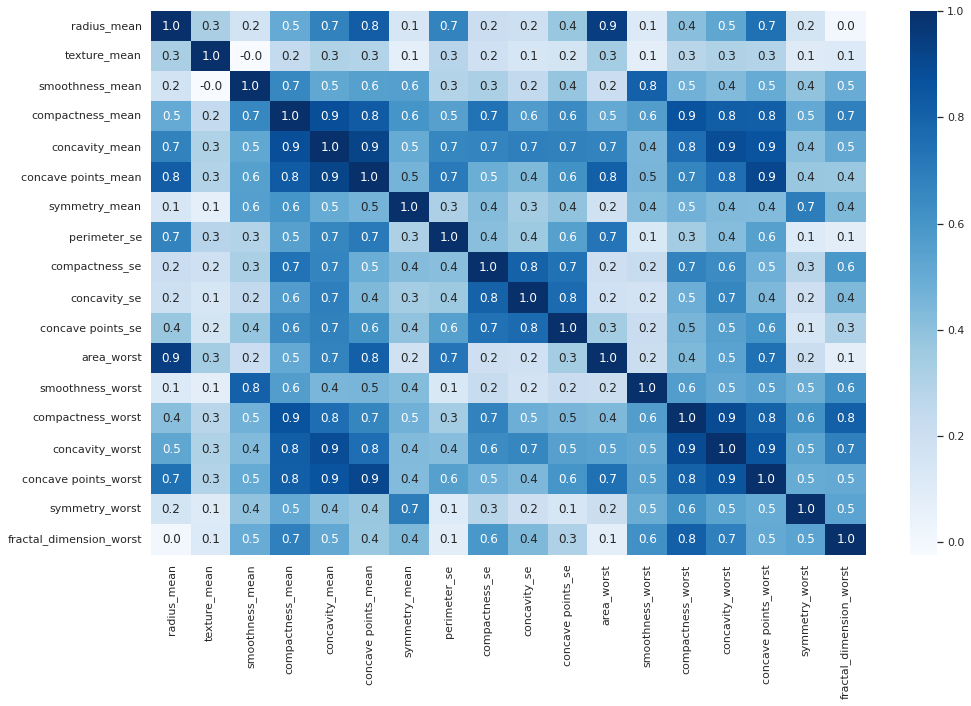

In [ ]:
# MATRIZ DE CORRELACIONES ENTRE LAS VARIABLES CUANTITATIVAS
corrMatrix = dfCuantitativa.corr(method= 'pearson')
corrMatrix

sns.set(font_scale=1)
plt.figure(figsize=(16, 10))
ax = sns.heatmap(corrMatrix,annot=True, fmt=".1f",cmap="Blues") 
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))

- ### <B> ELIMINANDO CORRELACIONES DE 0.9 </B>

In [ ]:
dfCuantitativa2 = dfCuantitativa.copy()

dfCuantitativa2 = dfCuantitativa2.drop(columns = ['concavity_mean'])
dfCuantitativa2 = dfCuantitativa2.drop(columns = ['area_worst'])
dfCuantitativa2 = dfCuantitativa2.drop(columns = ['compactness_mean'])
dfCuantitativa2 = dfCuantitativa2.drop(columns = ['compactness_worst'])
dfCuantitativa2 = dfCuantitativa2.drop(columns = ['concave points_worst'])

(13.0, 0.0)

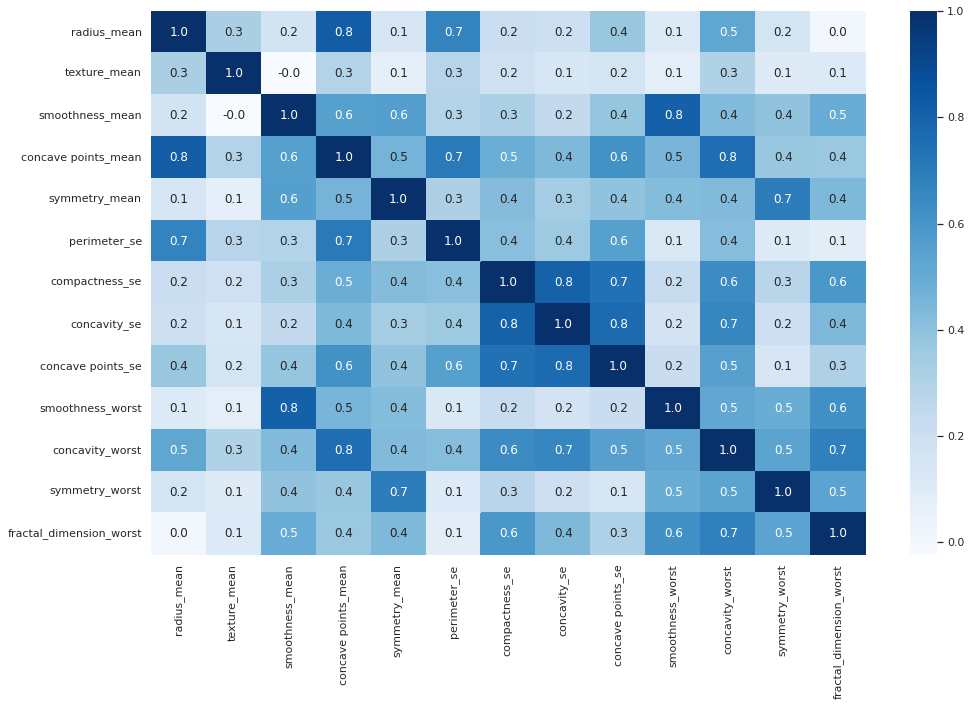

In [ ]:
# MATRIZ DE CORRELACIONES ENTRE LAS VARIABLES CUANTITATIVAS
corrMatrix2 = dfCuantitativa2.corr(method= 'pearson')
corrMatrix2

sns.set(font_scale=1)
plt.figure(figsize=(16, 10))
ax = sns.heatmap(corrMatrix2,annot=True, fmt=".1f",cmap="Blues") 
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))

## <B> ETAPA 5: CASOS ATÍPICOS UNIVARIADOS Y MULTIVARIADOS </B>

### <B> 5.1  PARA LAS VARIABLES EXPLICATIVAS CON CORRELACIÓN DE 0.9 PARA ABAJO </B>

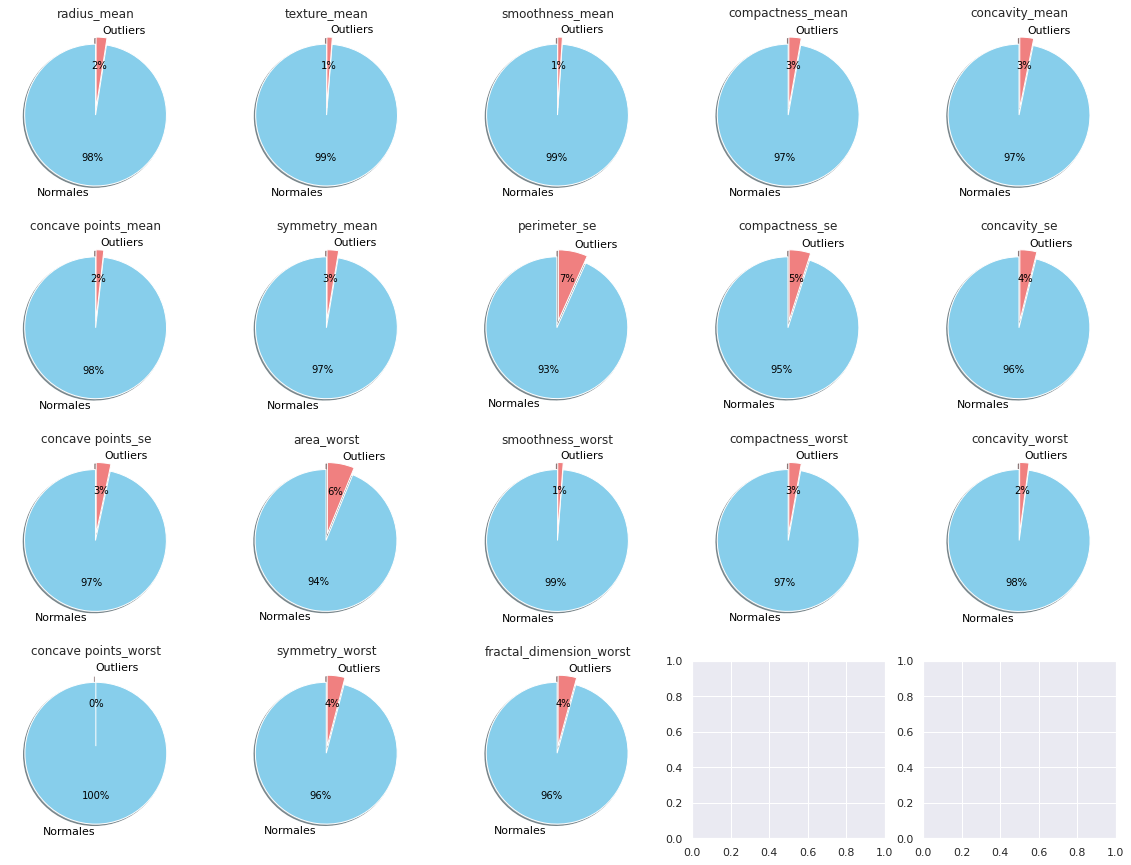

In [ ]:
variablesCuantitativas = dfCuantitativa.columns.values.tolist()

fig, axs = plt.subplots(4,5, figsize = (20,15))
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size'] = 10

j = 0
k = -1

for variableCuantitativa in variablesCuantitativas:
  if k >= 4:
    k = 0
    j += 1
  else:
    k += 1

  r = dfCuantitativa.loc[:,variableCuantitativa]
  Q1 = r.quantile(0.25)
  Q3 = r.quantile(0.75)
  IQR = Q3 - Q1
  #print("Variable : ", r.name )
  #print("Q1 = {}".format(Q1))
  #print("Q3 = {}".format(Q3))
  #print("IQR = {}".format(IQR))
  Data_normales = r[~((r < (Q1 - 1.5 * IQR)) |(r > (Q3 + 1.5 * IQR)))]
  Data_outliers = r[((r < (Q1 - 1.5 * IQR)) |(r > (Q3 + 1.5 * IQR)))]
  #print("Datos outliers = {}".format(Data_outliers.shape[0]))
  #print("Datos normales = {}".format(Data_normales.shape[0]))
  #print("-----------------")

  nOutliers = Data_outliers.shape[0]
  nNormales = Data_normales.shape[0]

  axs[j,k].pie([nNormales,nOutliers], labels = ["Normales","Outliers"], colors = ['skyblue','lightcoral'], startangle = 90, shadow = True, explode = (0.05, 0.05), autopct='%1.0f%%', radius =1)
  axs[j,k].set_title(variableCuantitativa)
  #s1 = sns.barplot(x = ["Normales","Outliers"], y = [nNormales,0], color = 'skyblue', ax = axs[j,k], label = None)
  #s2 = sns.barplot(x = ["Normales","Outliers"], y = [0,nOutliers], color = 'lightcoral', ax = axs[j,k], label = None).set_title(variableCuantitativa)

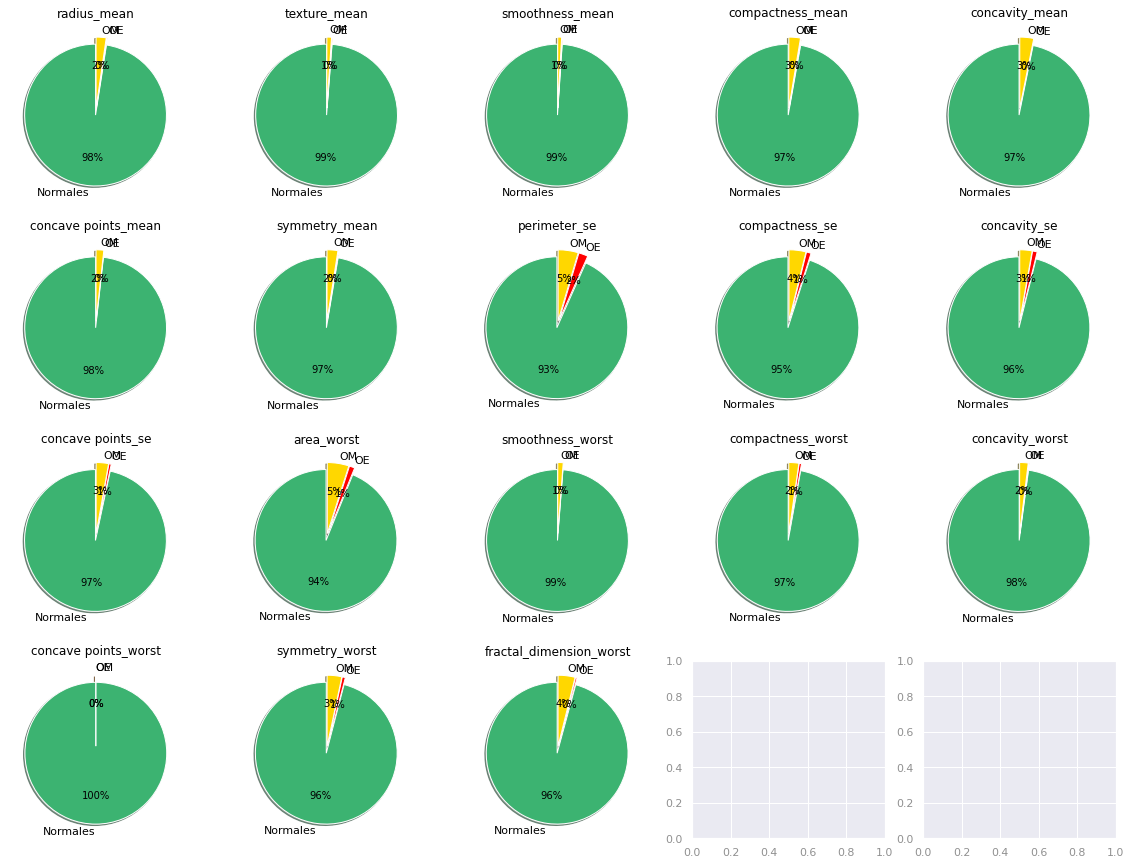

In [ ]:
variablesCuantitativas = dfCuantitativa.columns.values.tolist()

fig, axs = plt.subplots(4,5, figsize = (20,15))
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size'] = 10

j = 0
k = -1

for variableCuantitativa in variablesCuantitativas:
  if k >= 4:
    k = 0
    j += 1
  else:
    k += 1

  r = dfCuantitativa.loc[:,variableCuantitativa]
  Q1 = r.quantile(0.25)
  Q3 = r.quantile(0.75)
  IQR = Q3 - Q1

  Data_normales = r[((r > (Q1 - 1.5 * IQR)) & (r < (Q3 + 1.5 * IQR)))]
  Data_outliers_extremos = r[((r < (Q1 - 3 * IQR)) |(r > (Q3 + 3 * IQR)))]
  Data_outliers_moderados = r[((r < (Q1 - 1.5 * IQR)) & (r > (Q1 - 3 * IQR))) | ((r > (Q3 + 1.5 * IQR)) & (r < (Q3 + 3 * IQR)))]


  nOutliers_extremos = Data_outliers_extremos.shape[0]
  nNormales = Data_normales.shape[0]
  nOutliers_moderados = Data_outliers_moderados.shape[0]

  axs[j,k].pie([nNormales,nOutliers_extremos,nOutliers_moderados], labels = ["Normales","OE","OM"], colors = ['mediumseagreen','red','gold'], startangle = 90, shadow = True, explode = (0.05, 0.05,0.05), autopct='%1.0f%%', radius =1)
  axs[j,k].set_title(variableCuantitativa)

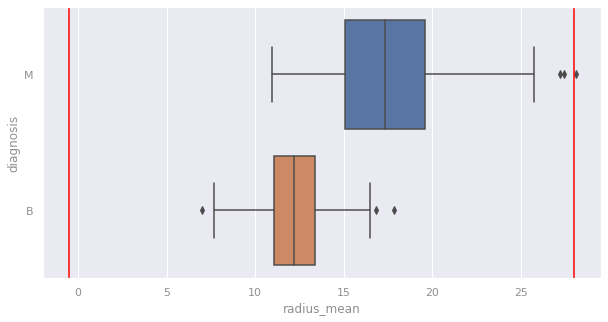

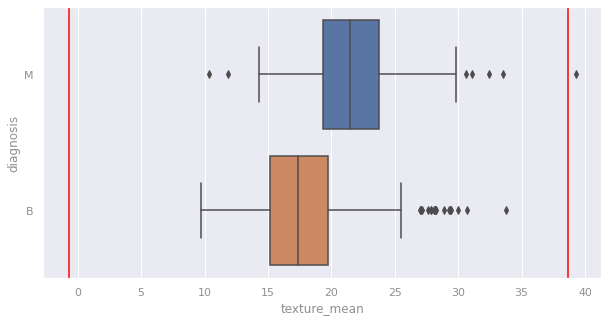

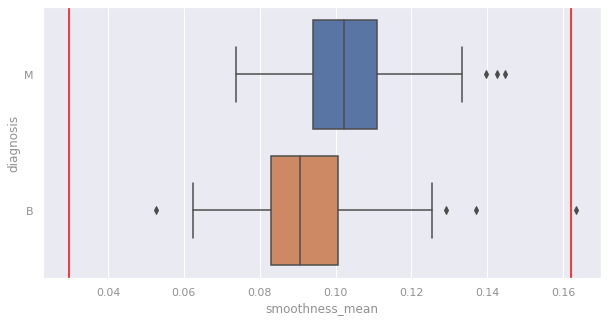

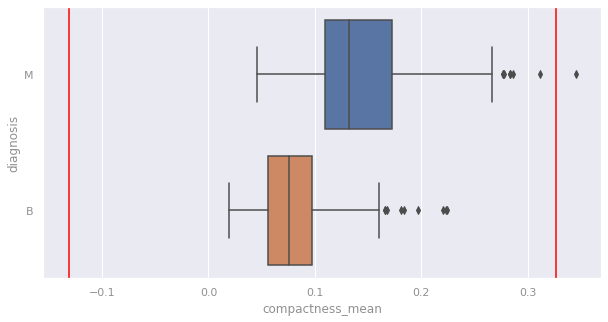

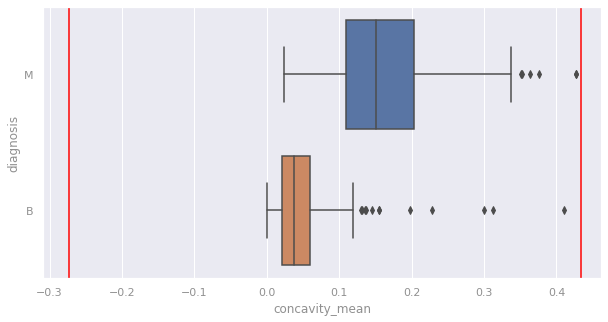

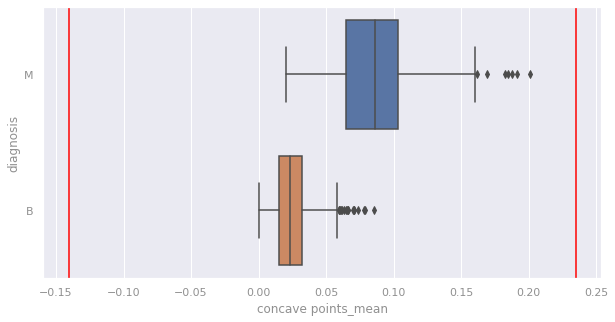

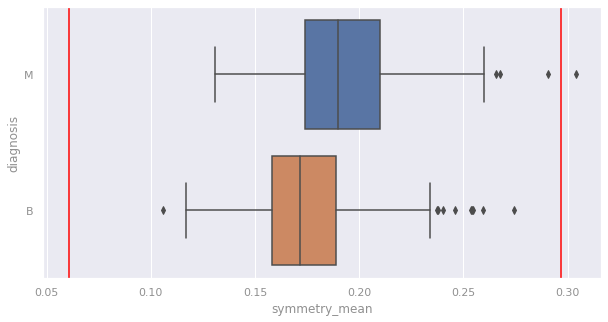

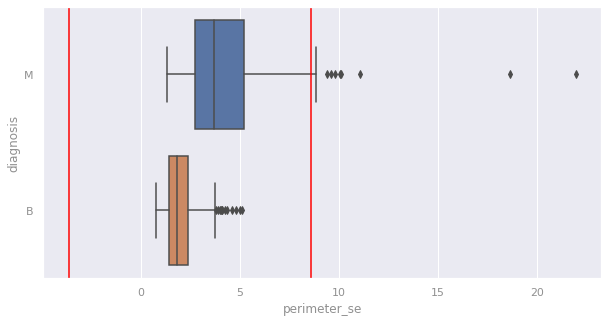

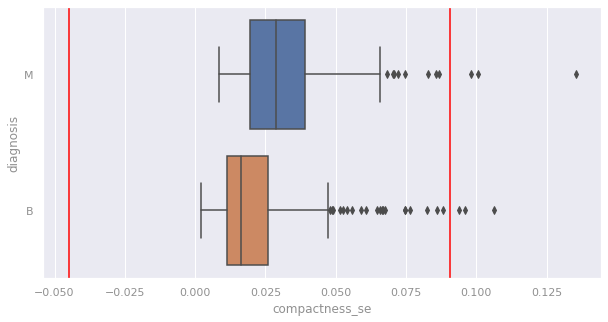

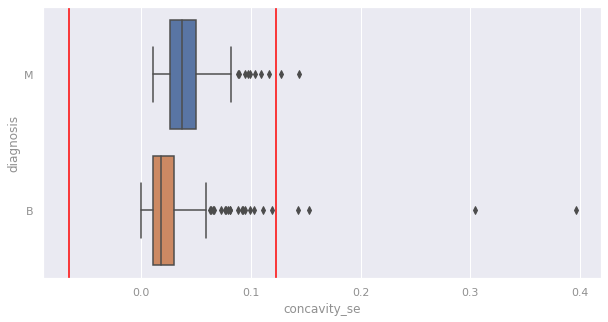

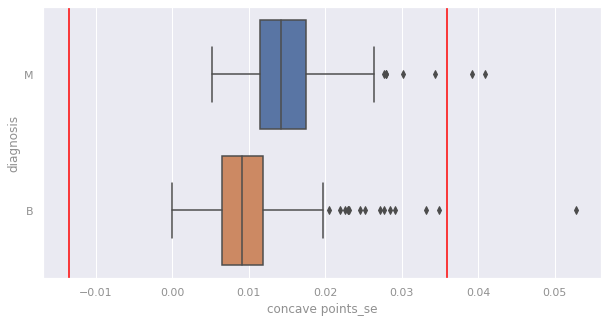

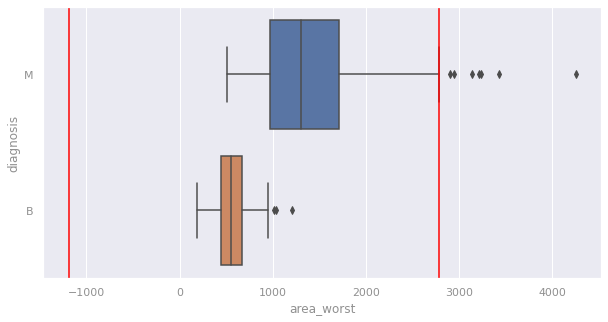

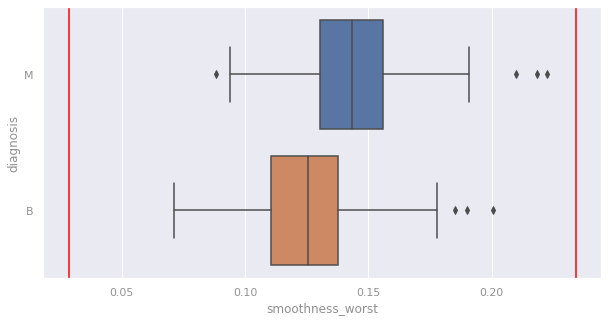

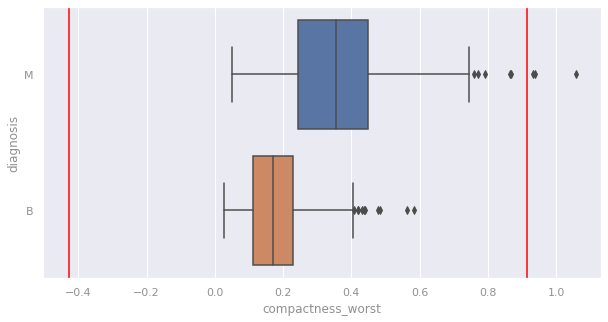

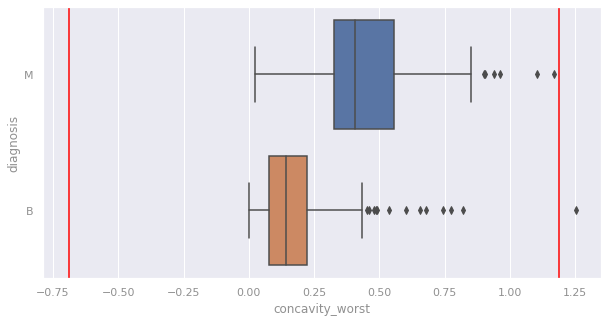

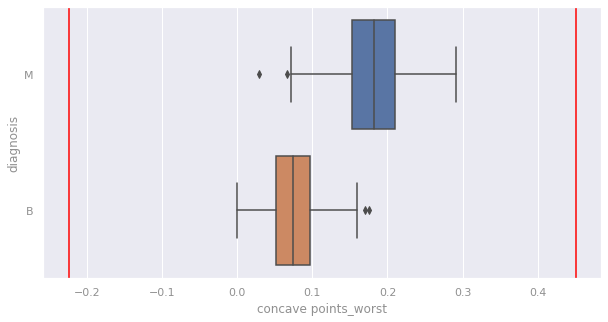

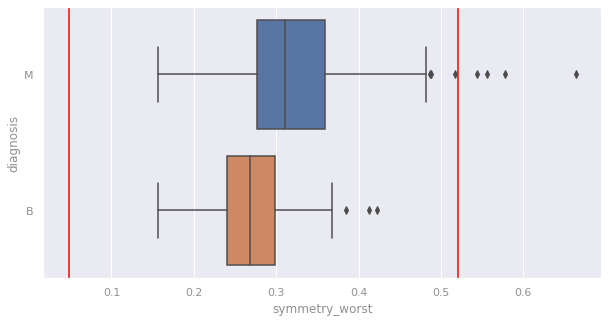

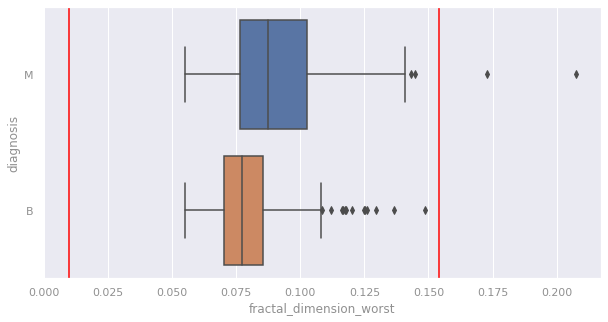

In [ ]:
for variableCuantitativa in variablesCuantitativas:
    data = pd.concat([df['diagnosis'], df[variableCuantitativa]], axis=1)
    f, ax = plt.subplots(figsize=(10, 5))
    fig = sns.boxplot(x=variableCuantitativa, y='diagnosis', data=data)
    IQR = df[variableCuantitativa].quantile(0.75)-df[variableCuantitativa].quantile(0.25)
    plt.axvline(x=(df[variableCuantitativa].quantile(0.25)-3*IQR),color ='red')
    plt.axvline(x=(df[variableCuantitativa].quantile(0.75)+3*IQR),color='red')
    plt.show()

In [ ]:
dfOut1 = pd.concat([dfCuantitativa, df['diagnosis']], axis = 1)
dfOut1['concavity_se'][dfOut1['concavity_se'] > 0.3] = np.median(dfOut1['concavity_se'])
dfOut1['perimeter_se'][dfOut1['perimeter_se'] > 15] = np.median(dfOut1['perimeter_se'])
dfOut1

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,perimeter_se,compactness_se,concavity_se,concave points_se,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,0.11840,0.27760,0.30010,0.14710,0.2419,8.589,0.04904,0.05373,0.01587,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,0.08474,0.07864,0.08690,0.07017,0.1812,3.398,0.01308,0.01860,0.01340,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,0.10960,0.15990,0.19740,0.12790,0.2069,4.585,0.04006,0.03832,0.02058,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,0.14250,0.28390,0.24140,0.10520,0.2597,3.445,0.07458,0.05661,0.01867,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,0.10030,0.13280,0.19800,0.10430,0.1809,5.438,0.02461,0.05688,0.01885,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.24390,0.13890,0.1726,7.673,0.02891,0.05198,0.02454,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,0.09780,0.10340,0.14400,0.09791,0.1752,5.203,0.02423,0.03950,0.01678,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,0.08455,0.10230,0.09251,0.05302,0.1590,3.425,0.03731,0.04730,0.01557,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,0.11780,0.27700,0.35140,0.15200,0.2397,5.772,0.06158,0.07117,0.01664,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


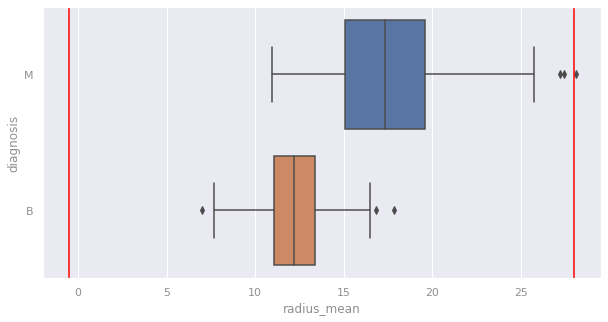

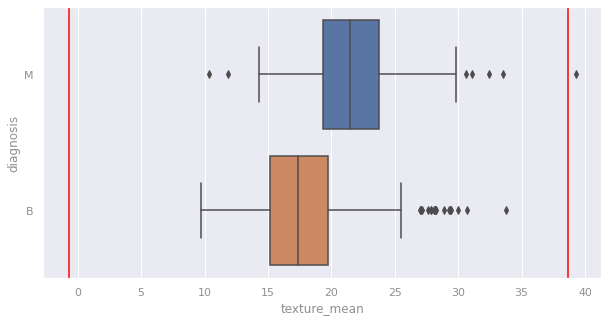

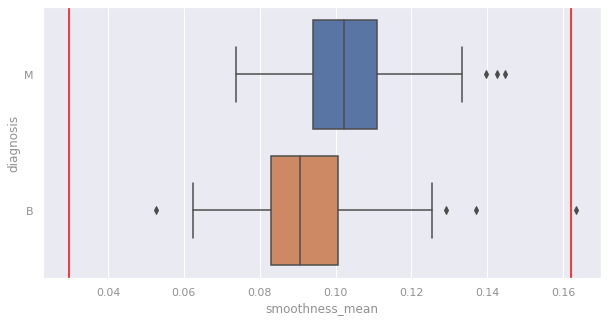

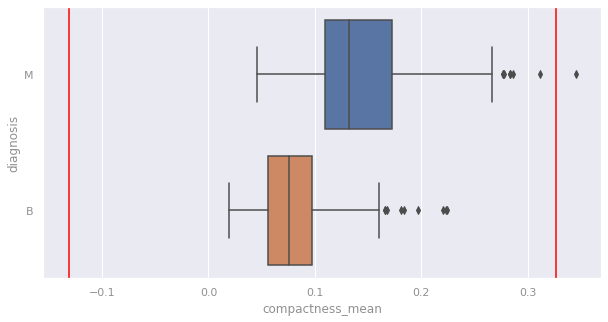

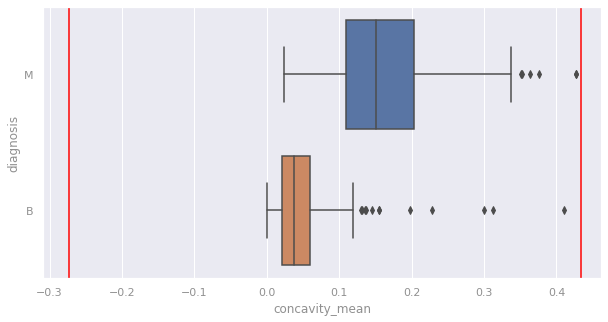

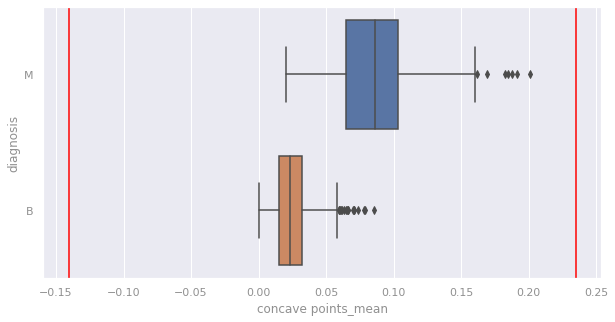

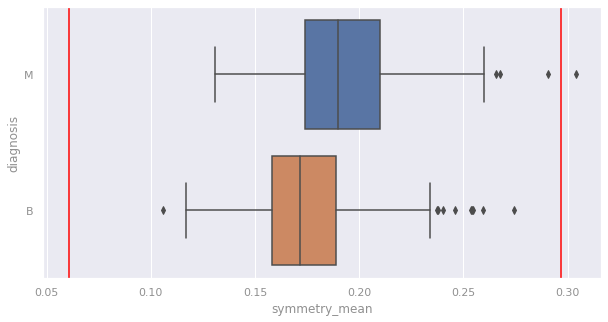

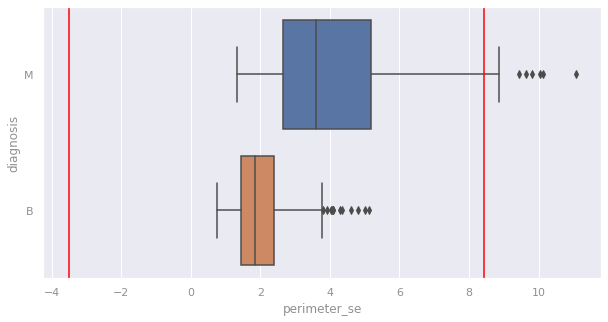

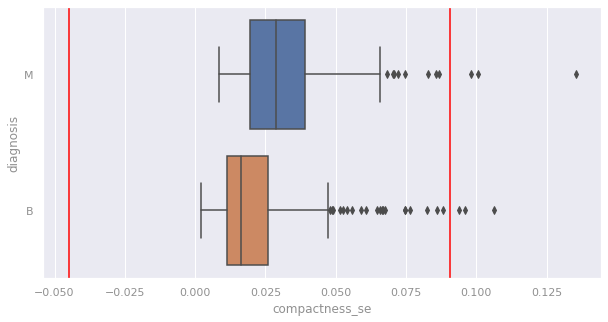

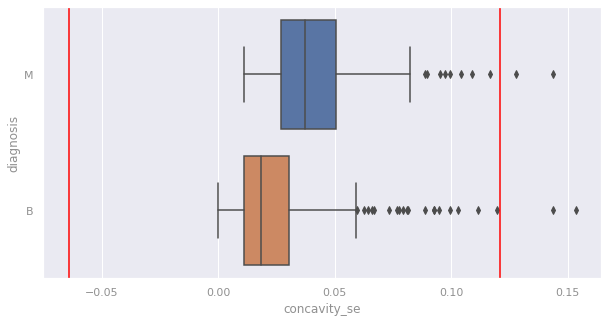

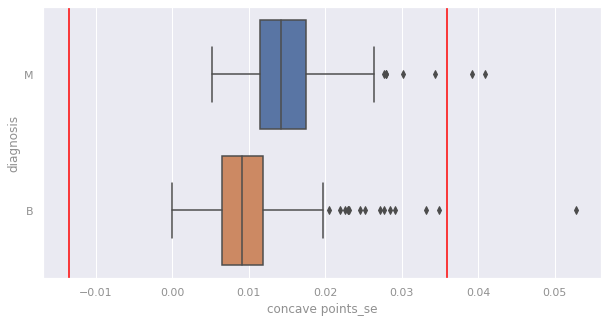

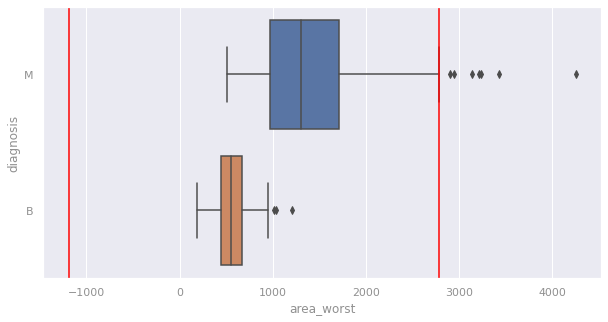

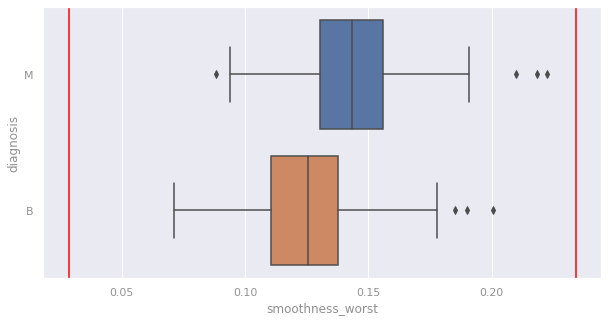

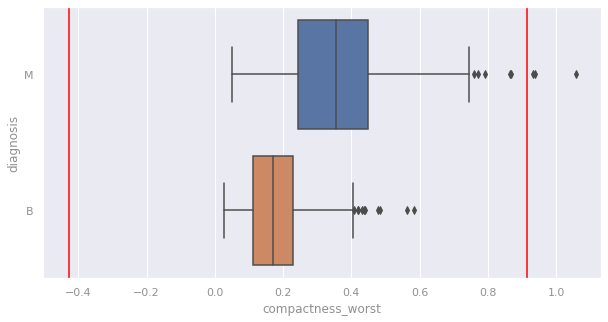

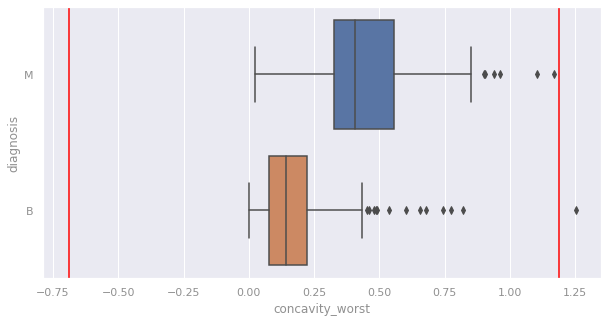

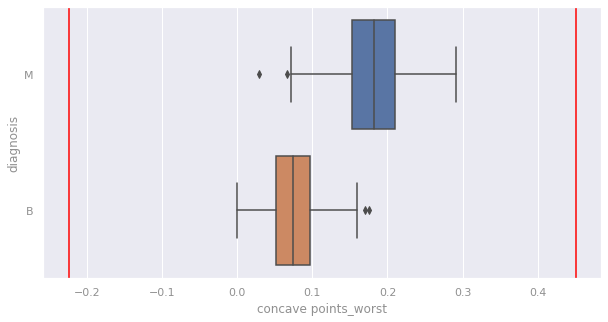

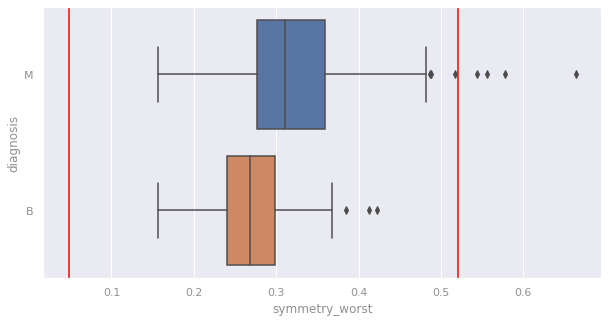

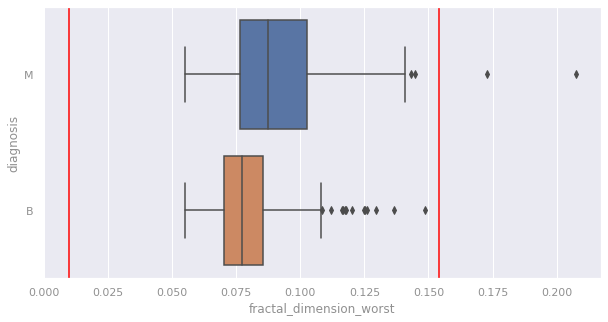

In [ ]:
for variableCuantitativa in variablesCuantitativas:
    data = pd.concat([dfOut1['diagnosis'], dfOut1[variableCuantitativa]], axis=1)
    f, ax = plt.subplots(figsize=(10, 5))
    fig = sns.boxplot(x=variableCuantitativa, y='diagnosis', data=data)
    IQR = dfOut1[variableCuantitativa].quantile(0.75)-dfOut1[variableCuantitativa].quantile(0.25)
    plt.axvline(x=(dfOut1[variableCuantitativa].quantile(0.25)-3*IQR),color ='red')
    plt.axvline(x=(dfOut1[variableCuantitativa].quantile(0.75)+3*IQR),color='red')
    plt.show()

In [ ]:
dfOut1X = dfOut1.drop(columns = ["diagnosis"])
dfOut1Y = dfOut1["diagnosis"]

In [ ]:
dfOut1X_stdD = StandardScaler().fit_transform(dfOut1X)
columnas = dfOut1X.columns

dfOut1X_std = pd.DataFrame(dfOut1X_stdD, columns = columnas)
dfOut1_std = pd.concat([dfOut1X_std, dfOut1Y], axis = 1)
dfOut1_std

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,perimeter_se,compactness_se,concavity_se,concave points_se,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.568466,3.283515,2.652874,2.532475,2.217515,3.341867,1.316862,0.983699,0.660820,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,M
1,1.829821,-0.353632,-0.826962,-0.487072,-0.023846,0.548144,0.001392,0.343819,-0.692926,-0.520419,0.260162,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,M
2,1.579888,0.456187,0.942210,1.052926,1.363478,2.037231,0.939685,1.029367,0.814974,0.323908,1.424827,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,M
3,-0.768909,0.253732,3.283553,3.402909,1.915897,1.451707,2.867383,0.370963,2.744280,1.107008,1.115007,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,M
4,1.750297,-1.151816,0.280372,0.539340,1.371011,1.428493,-0.009560,1.522015,-0.048520,1.118568,1.144205,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,1.041842,0.219060,1.947285,2.320965,-0.312589,2.812834,0.191805,0.908771,2.067178,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,M
565,1.704854,2.085134,0.102458,-0.017833,0.693043,1.263669,-0.217664,1.386292,-0.069758,0.374430,0.808431,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,M
566,0.702284,2.045574,-0.840484,-0.038680,0.046588,0.105777,-0.809117,0.359412,0.661277,0.708393,0.612157,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,M
567,1.838341,2.336457,1.525767,3.272144,3.296944,2.658866,2.137194,1.714916,2.017716,1.730405,0.785721,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,M


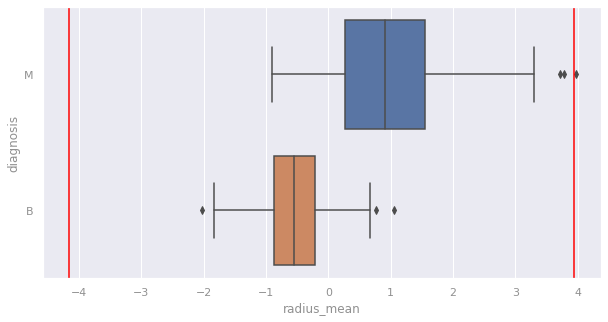

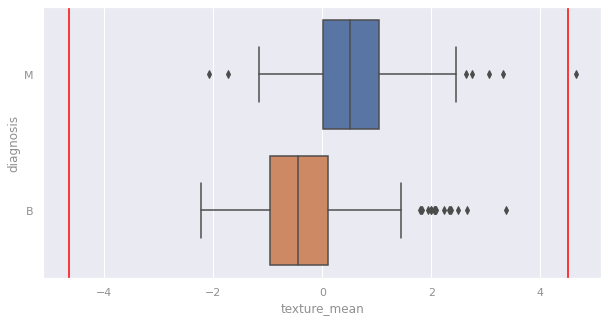

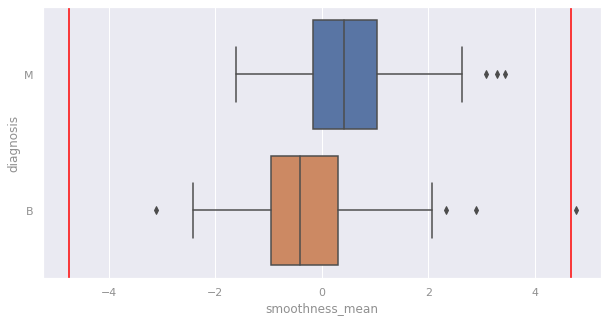

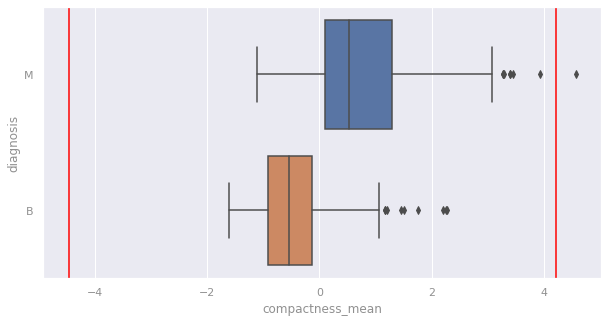

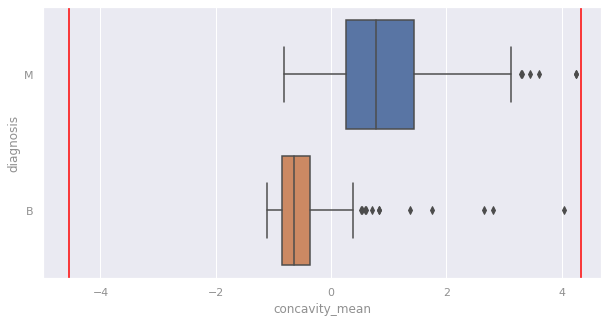

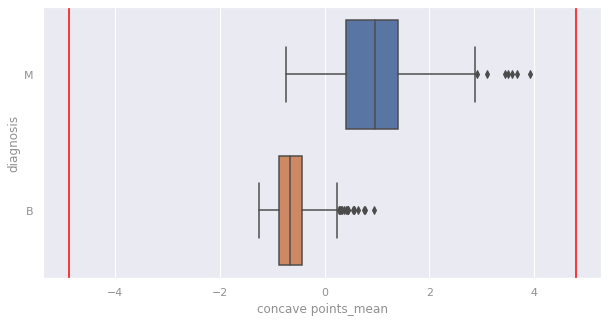

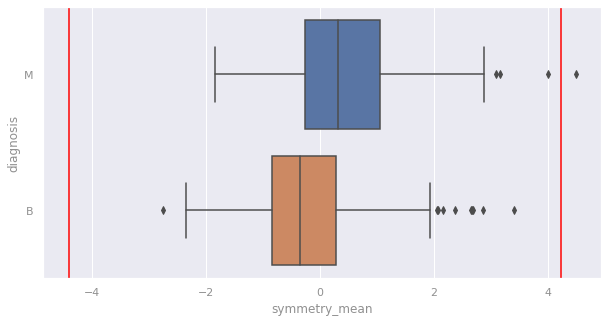

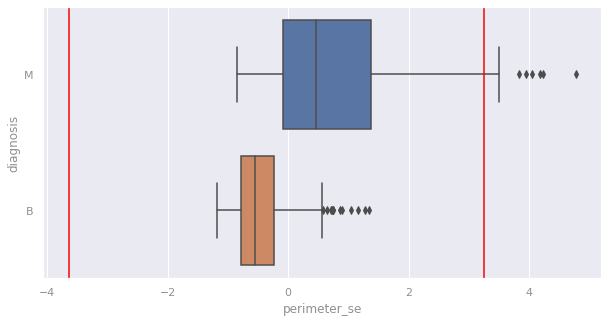

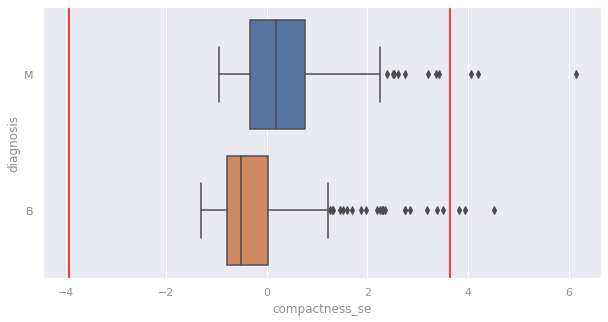

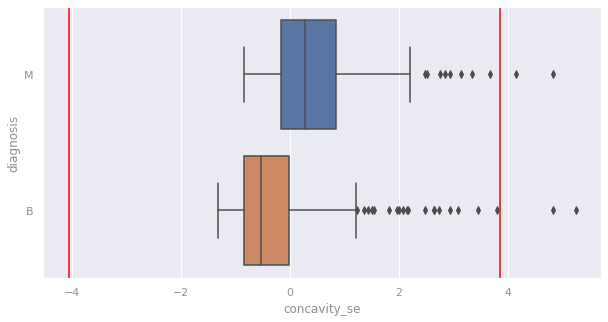

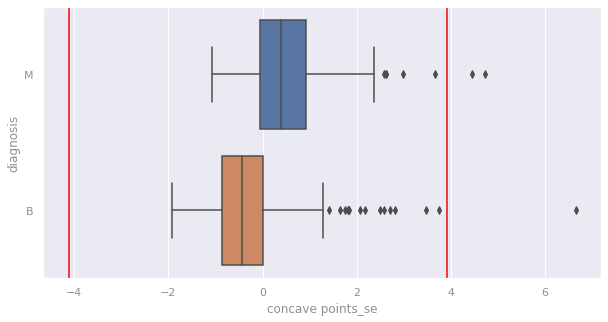

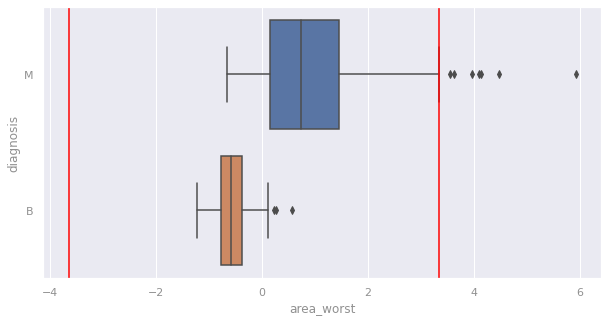

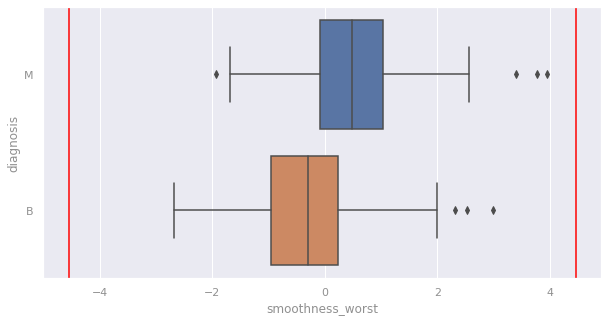

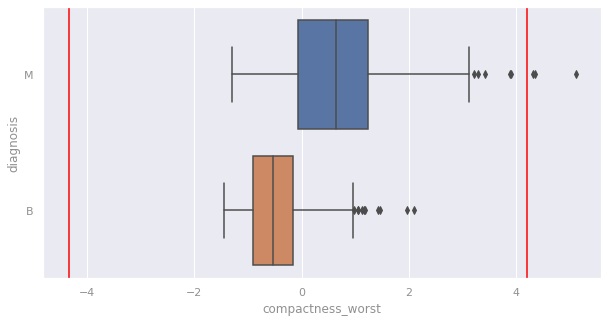

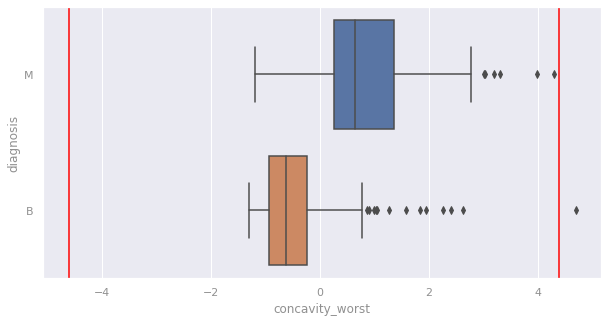

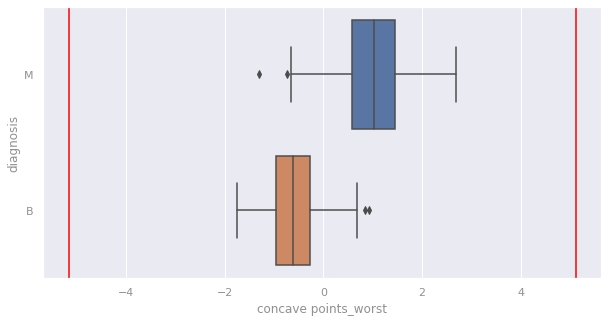

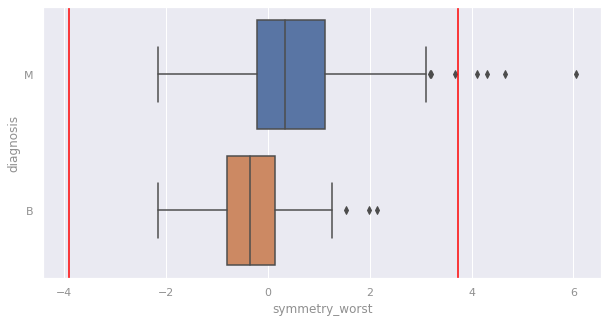

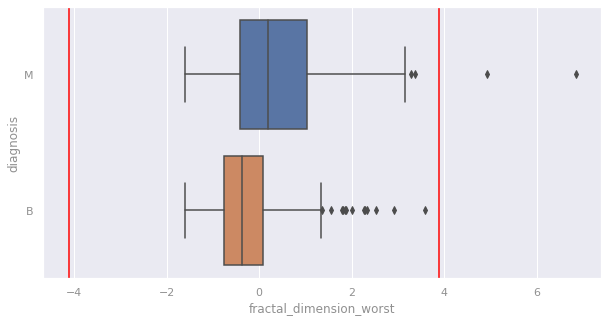

In [ ]:
for variableCuantitativa in variablesCuantitativas:
    data = pd.concat([dfOut1_std['diagnosis'], dfOut1_std[variableCuantitativa]], axis=1)
    f, ax = plt.subplots(figsize=(10, 5))
    fig = sns.boxplot(x=variableCuantitativa, y='diagnosis', data=data)
    IQR = dfOut1_std[variableCuantitativa].quantile(0.75)-dfOut1_std[variableCuantitativa].quantile(0.25)
    plt.axvline(x=(dfOut1_std[variableCuantitativa].quantile(0.25)-3*IQR),color ='red')
    plt.axvline(x=(dfOut1_std[variableCuantitativa].quantile(0.75)+3*IQR),color='red')
    plt.show()

### <B> 5.2  PARA LAS VARIABLES EXPLICATIVAS CON CORRELACIÓN DE 0.8 PARA ABAJO </B>

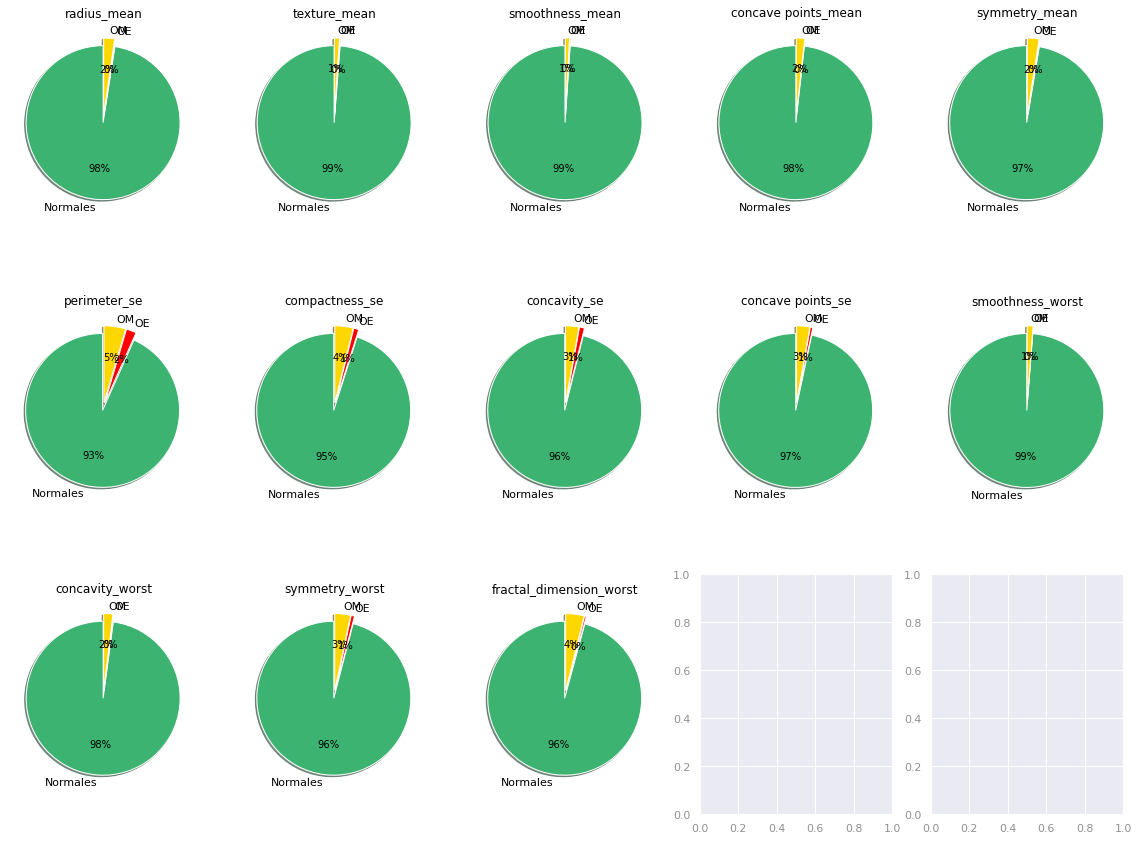

In [ ]:
variablesCuantitativas = dfCuantitativa2.columns.values.tolist()

fig, axs = plt.subplots(3,5, figsize = (20,15))
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size'] = 10

j = 0
k = -1

for variableCuantitativa in variablesCuantitativas:
  if k >= 4:
    k = 0
    j += 1
  else:
    k += 1

  r = dfCuantitativa2.loc[:,variableCuantitativa]
  Q1 = r.quantile(0.25)
  Q3 = r.quantile(0.75)
  IQR = Q3 - Q1

  Data_normales = r[((r > (Q1 - 1.5 * IQR)) & (r < (Q3 + 1.5 * IQR)))]
  Data_outliers_extremos = r[((r < (Q1 - 3 * IQR)) |(r > (Q3 + 3 * IQR)))]
  Data_outliers_moderados = r[((r < (Q1 - 1.5 * IQR)) & (r > (Q1 - 3 * IQR))) | ((r > (Q3 + 1.5 * IQR)) & (r < (Q3 + 3 * IQR)))]


  nOutliers_extremos = Data_outliers_extremos.shape[0]
  nNormales = Data_normales.shape[0]
  nOutliers_moderados = Data_outliers_moderados.shape[0]

  axs[j,k].pie([nNormales,nOutliers_extremos,nOutliers_moderados], labels = ["Normales","OE","OM"], colors = ['mediumseagreen','red','gold'], startangle = 90, shadow = True, explode = (0.05, 0.05,0.05), autopct='%1.0f%%', radius =1)
  axs[j,k].set_title(variableCuantitativa)

In [ ]:
dfOut2 = pd.concat([dfCuantitativa2, df['diagnosis']], axis = 1)
dfOut2['concavity_se'][dfOut2['concavity_se'] > 0.3] = np.median(dfOut2['concavity_se'])
dfOut2['perimeter_se'][dfOut2['perimeter_se'] > 15] = np.median(dfOut2['perimeter_se'])
dfOut2

,radius_mean,texture_mean,smoothness_mean,concave points_mean,symmetry_mean,perimeter_se,compactness_se,concavity_se,concave points_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,0.11840,0.14710,0.2419,8.589,0.04904,0.05373,0.01587,0.16220,0.7119,0.4601,0.11890,M
1,20.57,17.77,0.08474,0.07017,0.1812,3.398,0.01308,0.01860,0.01340,0.12380,0.2416,0.2750,0.08902,M
2,19.69,21.25,0.10960,0.12790,0.2069,4.585,0.04006,0.03832,0.02058,0.14440,0.4504,0.3613,0.08758,M
3,11.42,20.38,0.14250,0.10520,0.2597,3.445,0.07458,0.05661,0.01867,0.20980,0.6869,0.6638,0.17300,M
4,20.29,14.34,0.10030,0.10430,0.1809,5.438,0.02461,0.05688,0.01885,0.13740,0.4000,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.13890,0.1726,7.673,0.02891,0.05198,0.02454,0.14100,0.4107,0.2060,0.07115,M
565,20.13,28.25,0.09780,0.09791,0.1752,5.203,0.02423,0.03950,0.01678,0.11660,0.3215,0.2572,0.06637,M
566,16.60,28.08,0.08455,0.05302,0.1590,3.425,0.03731,0.04730,0.01557,0.11390,0.3403,0.2218,0.07820,M
567,20.60,29.33,0.11780,0.15200,0.2397,5.772,0.06158,0.07117,0.01664,0.16500,0.9387,0.4087,0.12400,M


In [ ]:
dfOut2X = dfOut2.drop(columns = ["diagnosis"])
dfOut2Y = dfOut2["diagnosis"]

dfOut2X_stdD = StandardScaler().fit_transform(dfOut2X)
columnas = dfOut2X.columns

dfOut2X_std = pd.DataFrame(dfOut2X_stdD, columns = columnas)
dfOut2_std = pd.concat([dfOut2X_std, dfOut2Y], axis = 1)
dfOut2_std

,radius_mean,texture_mean,smoothness_mean,concave points_mean,symmetry_mean,perimeter_se,compactness_se,concavity_se,concave points_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.568466,2.532475,2.217515,3.341867,1.316862,0.983699,0.660820,1.307686,2.109526,2.750622,1.937015,M
1,1.829821,-0.353632,-0.826962,0.548144,0.001392,0.343819,-0.692926,-0.520419,0.260162,-0.375612,-0.146749,-0.243890,0.281190,M
2,1.579888,0.456187,0.942210,2.037231,0.939685,1.029367,0.814974,0.323908,1.424827,0.527407,0.854974,1.152255,0.201391,M
3,-0.768909,0.253732,3.283553,1.451707,2.867383,0.370963,2.744280,1.107008,1.115007,3.394275,1.989588,6.046041,4.935010,M
4,1.750297,-1.151816,0.280372,1.428493,-0.009560,1.522015,-0.048520,1.118568,1.144205,0.220556,0.613179,-0.868353,-0.397100,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,1.041842,2.320965,-0.312589,2.812834,0.191805,0.908771,2.067178,0.378365,0.664512,-1.360158,-0.709091,M
565,1.704854,2.085134,0.102458,1.263669,-0.217664,1.386292,-0.069758,0.374430,0.808431,-0.691230,0.236573,-0.531855,-0.973978,M
566,0.702284,2.045574,-0.840484,0.105777,-0.809117,0.359412,0.661277,0.708393,0.612157,-0.809587,0.326767,-1.104549,-0.318409,M
567,1.838341,2.336457,1.525767,2.658866,2.137194,1.714916,2.017716,1.730405,0.785721,1.430427,3.197605,1.919083,2.219635,M


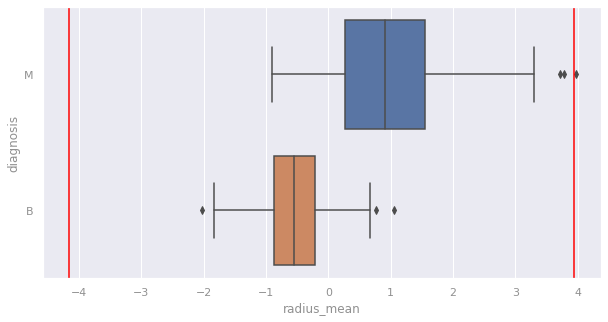

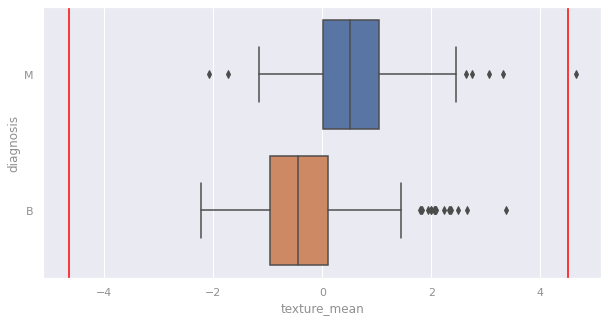

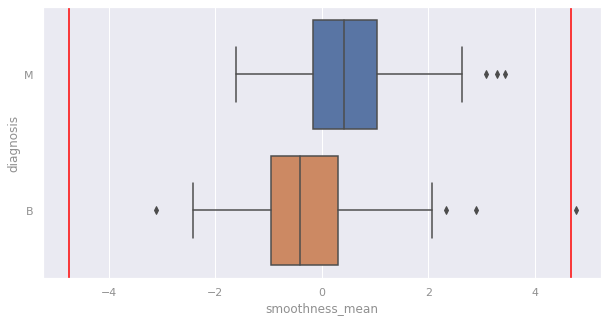

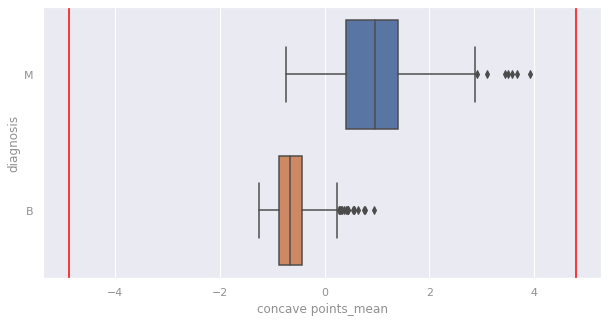

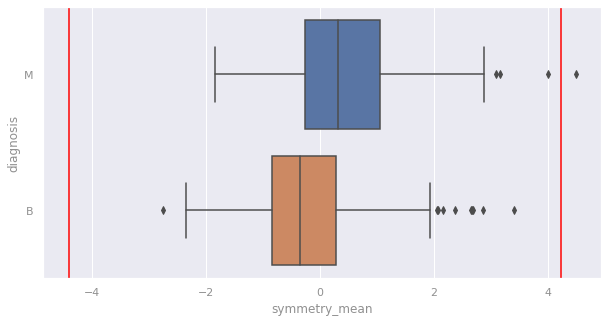

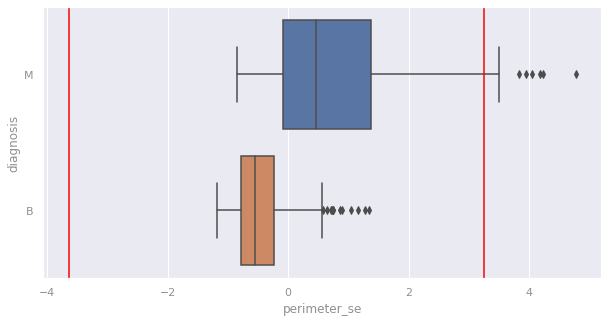

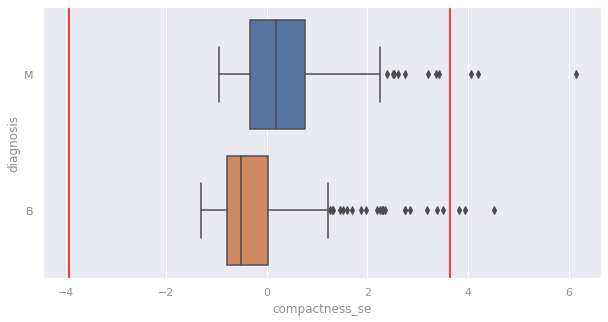

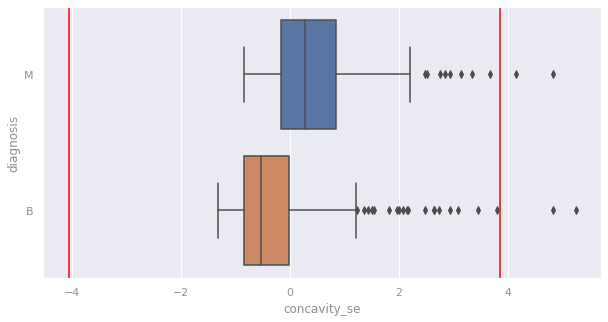

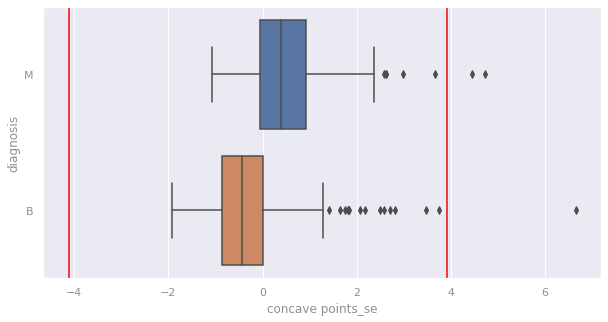

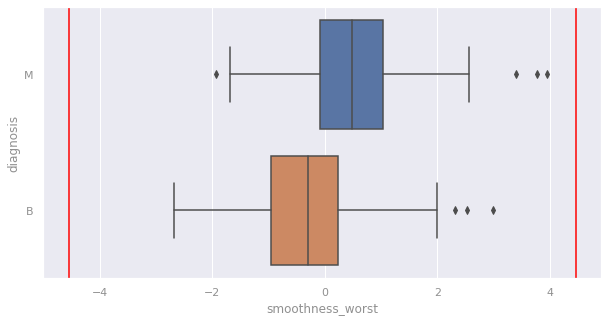

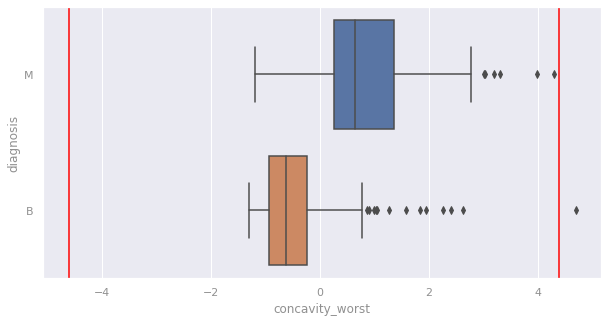

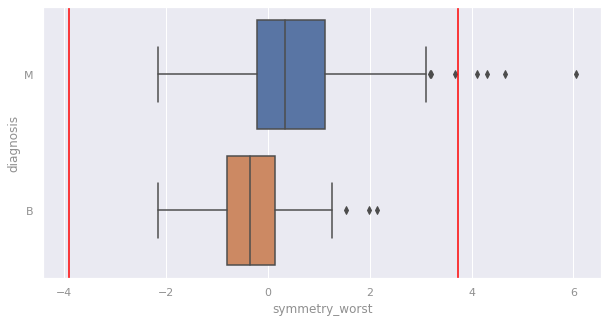

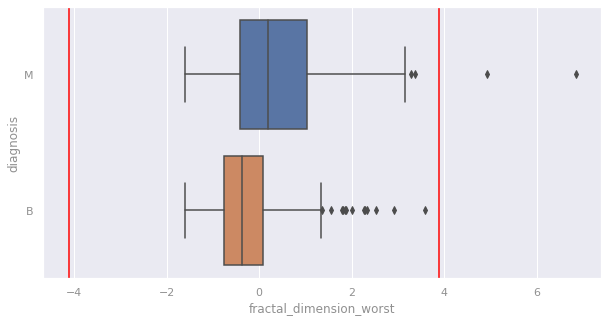

In [ ]:
for variableCuantitativa in variablesCuantitativas:
    data = pd.concat([dfOut1_std['diagnosis'], dfOut1_std[variableCuantitativa]], axis=1)
    f, ax = plt.subplots(figsize=(10, 5))
    fig = sns.boxplot(x=variableCuantitativa, y='diagnosis', data=data)
    IQR = dfOut1_std[variableCuantitativa].quantile(0.75)-dfOut1_std[variableCuantitativa].quantile(0.25)
    plt.axvline(x=(dfOut1_std[variableCuantitativa].quantile(0.25)-3*IQR),color ='red')
    plt.axvline(x=(dfOut1_std[variableCuantitativa].quantile(0.75)+3*IQR),color='red')
    plt.show()

In [ ]:
dfOut1_std['diagnosis'] = dfOut1_std['diagnosis'].astype('category')

reemplazos = {"M" : 1,
             "B" : 0}

dfOut1_std['diagnosis'].replace(reemplazos, inplace = True)

dfOut1_std

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,perimeter_se,compactness_se,concavity_se,concave points_se,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.568466,3.283515,2.652874,2.532475,2.217515,3.341867,1.316862,0.983699,0.660820,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,1.829821,-0.353632,-0.826962,-0.487072,-0.023846,0.548144,0.001392,0.343819,-0.692926,-0.520419,0.260162,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,1.579888,0.456187,0.942210,1.052926,1.363478,2.037231,0.939685,1.029367,0.814974,0.323908,1.424827,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
3,-0.768909,0.253732,3.283553,3.402909,1.915897,1.451707,2.867383,0.370963,2.744280,1.107008,1.115007,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
4,1.750297,-1.151816,0.280372,0.539340,1.371011,1.428493,-0.009560,1.522015,-0.048520,1.118568,1.144205,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,1.041842,0.219060,1.947285,2.320965,-0.312589,2.812834,0.191805,0.908771,2.067178,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,1
565,1.704854,2.085134,0.102458,-0.017833,0.693043,1.263669,-0.217664,1.386292,-0.069758,0.374430,0.808431,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,1
566,0.702284,2.045574,-0.840484,-0.038680,0.046588,0.105777,-0.809117,0.359412,0.661277,0.708393,0.612157,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,1
567,1.838341,2.336457,1.525767,3.272144,3.296944,2.658866,2.137194,1.714916,2.017716,1.730405,0.785721,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,1


In [ ]:
dfOut2_std['diagnosis'] = dfOut2_std['diagnosis'].astype('category')

reemplazos2 = {"M" : 1,
             "B" : 0}
dfOut2_std['diagnosis'].replace(reemplazos2, inplace = True)

dfOut2_std

,radius_mean,texture_mean,smoothness_mean,concave points_mean,symmetry_mean,perimeter_se,compactness_se,concavity_se,concave points_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.568466,2.532475,2.217515,3.341867,1.316862,0.983699,0.660820,1.307686,2.109526,2.750622,1.937015,1
1,1.829821,-0.353632,-0.826962,0.548144,0.001392,0.343819,-0.692926,-0.520419,0.260162,-0.375612,-0.146749,-0.243890,0.281190,1
2,1.579888,0.456187,0.942210,2.037231,0.939685,1.029367,0.814974,0.323908,1.424827,0.527407,0.854974,1.152255,0.201391,1
3,-0.768909,0.253732,3.283553,1.451707,2.867383,0.370963,2.744280,1.107008,1.115007,3.394275,1.989588,6.046041,4.935010,1
4,1.750297,-1.151816,0.280372,1.428493,-0.009560,1.522015,-0.048520,1.118568,1.144205,0.220556,0.613179,-0.868353,-0.397100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,1.041842,2.320965,-0.312589,2.812834,0.191805,0.908771,2.067178,0.378365,0.664512,-1.360158,-0.709091,1
565,1.704854,2.085134,0.102458,1.263669,-0.217664,1.386292,-0.069758,0.374430,0.808431,-0.691230,0.236573,-0.531855,-0.973978,1
566,0.702284,2.045574,-0.840484,0.105777,-0.809117,0.359412,0.661277,0.708393,0.612157,-0.809587,0.326767,-1.104549,-0.318409,1
567,1.838341,2.336457,1.525767,2.658866,2.137194,1.714916,2.017716,1.730405,0.785721,1.430427,3.197605,1.919083,2.219635,1


## <B> ETAPA 6: CREACIÓN DE MODELOS DE CLASIFICACIÓN DE MACHINE LEARNING </B>

### <B> 6.1 MODELO DE REGRESIÓN LOGÍSTICA </B>

### <B> 6.1.1 PARA VARIABLES EXPLICATIVAS CON CORRELACIÓN DE 0.9 PARA ABAJO </B>

In [ ]:
#División entre Train y Test

X1=dfOut1_std.drop('diagnosis',axis=1)
y1=dfOut1_std['diagnosis']
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1,y1, test_size=0.20,random_state=1,stratify=y1)

In [ ]:
# Modelo de regresión logística

model_logit = sm.Logit(y_train_1, X_train_1)
model_logit1 = model_logit.fit(method='newton')

predict_train_logit1 = model_logit1.predict(X_train_1)
predict_test_logit1 = model_logit1.predict(X_test_1)

print("auc on training in LogisticRegression data : {:.3f}".format(roc_auc_score(y_train_1, predict_train_logit1) ))
print("auc on testing in LogisticRegression  data : {:.3f}".format(roc_auc_score(y_test_1, predict_test_logit1) ))


Optimization terminated successfully.
         Current function value: 0.050280
         Iterations 12
auc on training in LogisticRegression data : 0.997
auc on testing in LogisticRegression  data : 0.997


In [ ]:
predict_test_logit1

196    9.999228e-01
120    8.777495e-05
151    5.444690e-04
280    1.000000e+00
288    1.118185e-06
           ...     
429    4.811568e-06
467    7.207924e-06
540    8.012592e-08
471    1.662340e-02
35     9.999997e-01
Length: 114, dtype: float64

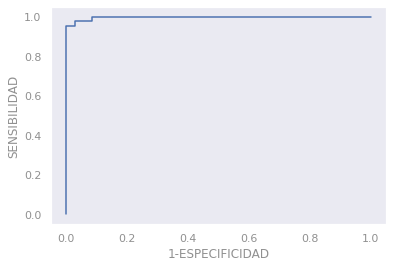

In [ ]:
espec_11, sens1, umbrales1 = roc_curve(y_test_1,predict_test_logit1)
plt.plot(espec_11,sens1)
plt.xlabel("1-ESPECIFICIDAD")
plt.ylabel("SENSIBILIDAD")
plt.grid()
plt.show()

In [ ]:
list(zip(umbrales1,sens1,espec_11))

[(1.9999999999999998, 0.0, 0.0),
 (0.9999999999999998, 0.023809523809523808, 0.0),
 (0.9999999999999991, 0.07142857142857142, 0.0),
 (0.8791908336681575, 0.9523809523809523, 0.0),
 (0.50635861797314, 0.9523809523809523, 0.027777777777777776),
 (0.27608187047281735, 0.9761904761904762, 0.027777777777777776),
 (0.016623395286673545, 0.9761904761904762, 0.08333333333333333),
 (0.012153916725935464, 1.0, 0.08333333333333333),
 (7.151950903104879e-09, 1.0, 1.0)]

In [ ]:
# PARÁMETRO DE VALIDACIÓN: SENSIBILIDAD
clasificacion_predict_train_logit1 = np.where(predict_train_logit1<0.28, 0, 1)
clasificacion_predict_test_logit1 = np.where(predict_test_logit1<0.28, 0, 1)

print("accuracy on training in LogisticRegression data : {:.3f}".format(recall_score(y_train_1, clasificacion_predict_train_logit1)))
print("accuracy on testing in LogisticRegression  data : {:.3f}".format(recall_score(y_test_1,clasificacion_predict_test_logit1)))

accuracy on training in LogisticRegression data : 0.976
accuracy on testing in LogisticRegression  data : 0.952


In [ ]:
# PARÁMETRO DE VALIDACIÓN: EXACTITUD
clasificacion_predict_train_logit= np.where(predict_train_logit1<0.28, 0, 1)
clasificacion_predict_test_logit= np.where(predict_test_logit1<0.28, 0, 1)

print("accuracy on training in LogisticRegression data : {:.3f}".format(accuracy_score(y_train_1, clasificacion_predict_train_logit1)))
print("accuracy on testing in LogisticRegression  data : {:.3f}".format(accuracy_score(y_test_1,clasificacion_predict_test_logit1)))

accuracy on training in LogisticRegression data : 0.982
accuracy on testing in LogisticRegression  data : 0.965


In [ ]:
# PARÁMETRO DE VALIDACIÓN: F1-SCORE
clasificacion_predict_train_logit= np.where(predict_train_logit1<0.28, 0, 1)
clasificacion_predict_test_logit= np.where(predict_test_logit1<0.28, 0, 1)

print("accuracy on training in LogisticRegression data : {:.3f}".format(f1_score(y_train_1, clasificacion_predict_train_logit1)))
print("accuracy on testing in LogisticRegression  data : {:.3f}".format(f1_score(y_test_1,clasificacion_predict_test_logit1)))

accuracy on training in LogisticRegression data : 0.976
accuracy on testing in LogisticRegression  data : 0.952


### <B> 6.1.2 PARA VARIABLES EXPLICATIVAS CON CORRELACIÓN DE 0.8 PARA ABAJO </B>

In [ ]:
# Divisón entre Train y Test

X2=dfOut2_std.drop(['diagnosis'],axis=1)
y2=dfOut2_std[['diagnosis']]
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2,y2, test_size=0.20,random_state=1,stratify=y2)

In [ ]:
# Modelo de regresión logística

model_logit = sm.Logit(y_train_2, X_train_2)
model_logit2 = model_logit.fit(method='newton')

predict_train_logit2 = model_logit2.predict(X_train_2)
predict_test_logit2 = model_logit2.predict(X_test_2)

print("auc on training in LogisticRegression data : {:.3f}".format(roc_auc_score(y_train_2, predict_train_logit2)))
print("auc on testing in LogisticRegression  data : {:.3f}".format(roc_auc_score(y_test_2, predict_test_logit2)))

Optimization terminated successfully.
         Current function value: 0.061579
         Iterations 11
auc on training in LogisticRegression data : 0.996
auc on testing in LogisticRegression  data : 0.994


In [ ]:
predict_test_logit2

196    9.999881e-01
120    5.933868e-05
151    1.915017e-04
280    1.000000e+00
288    2.293631e-07
           ...     
429    1.560542e-05
467    5.362156e-05
540    3.034501e-07
471    5.210602e-02
35     9.999999e-01
Length: 114, dtype: float64

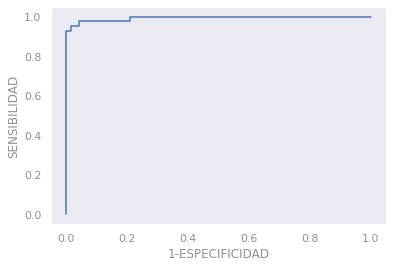

In [ ]:
espec_12, sens2, umbrales2 = roc_curve(y_test_2,predict_test_logit2)
plt.plot(espec_12,sens2)
plt.xlabel("1-ESPECIFICIDAD")
plt.ylabel("SENSIBILIDAD")
plt.grid()
plt.show()

In [ ]:
list(zip(umbrales2,sens2,espec_12))

[(1.9999999999999998, 0.0, 0.0),
 (0.9999999999999998, 0.023809523809523808, 0.0),
 (0.91055052246314, 0.9285714285714286, 0.0),
 (0.898431319772922, 0.9285714285714286, 0.013888888888888888),
 (0.8977514458528231, 0.9523809523809523, 0.013888888888888888),
 (0.5079747776253339, 0.9523809523809523, 0.041666666666666664),
 (0.4887169258708446, 0.9761904761904762, 0.041666666666666664),
 (0.004479209155130661, 0.9761904761904762, 0.20833333333333334),
 (0.003858101705674209, 1.0, 0.20833333333333334),
 (1.9546504690244757e-08, 1.0, 1.0)]

In [ ]:
# PARÁMETRO DE VALIDACIÓN: SENSIBILIDAD
clasificacion_predict_train_logit2 = np.where(predict_train_logit2<0.49, 0, 1)
clasificacion_predict_test_logit2 = np.where(predict_test_logit2<0.49, 0, 1)

print("accuracy on training in LogisticRegression data : {:.3f}".format(recall_score(y_train_2, clasificacion_predict_train_logit2)))
print("accuracy on testing in LogisticRegression  data : {:.3f}".format(recall_score(y_test_2,clasificacion_predict_test_logit2)))

accuracy on training in LogisticRegression data : 0.971
accuracy on testing in LogisticRegression  data : 0.952


In [ ]:
# PARÁMETRO DE VALIDACIÓN: EXACTITUD
clasificacion_predict_train_logit2 = np.where(predict_train_logit2<0.49, 0, 1)
clasificacion_predict_test_logit2 = np.where(predict_test_logit2<0.49, 0, 1)

print("accuracy on training in LogisticRegression data : {:.3f}".format(accuracy_score(y_train_2, clasificacion_predict_train_logit2)))
print("accuracy on testing in LogisticRegression  data : {:.3f}".format(accuracy_score(y_test_2,clasificacion_predict_test_logit2)))


accuracy on training in LogisticRegression data : 0.985
accuracy on testing in LogisticRegression  data : 0.956


In [ ]:
# PARÁMETRO DE VALIDACIÓN: SENSIBILIDAD
clasificacion_predict_train_logit2 = np.where(predict_train_logit2<0.49, 0, 1)
clasificacion_predict_test_logit2 = np.where(predict_test_logit2<0.49, 0, 1)

print("accuracy on training in LogisticRegression data : {:.3f}".format(f1_score(y_train_2, clasificacion_predict_train_logit2)))
print("accuracy on testing in LogisticRegression  data : {:.3f}".format(f1_score(y_test_2,clasificacion_predict_test_logit2)))

accuracy on training in LogisticRegression data : 0.979
accuracy on testing in LogisticRegression  data : 0.941


### <B> 6.2 MODELO DE ÁRBOL DE DECISIONES </B>

### <B> 6.2.1 PARA VARIABLES EXPLICATIVAS CON CORRELACIÓN DE 0.9 PARA ABAJO </B>

Para una profundidad de Árbol de  1  sensibilidad: 0.7874605209256574 , exactitud:  0.8857456140350877 , F1_score:  0.8314817178287803
Para una profundidad de Árbol de  2  sensibilidad: 0.9124672585905591 , exactitud:  0.9349310776942357 , F1_score:  0.9091533887069085
Para una profundidad de Árbol de  3  sensibilidad: 0.8991036866171473 , exactitud:  0.9419486215538848 , F1_score:  0.9160959739362944
Para una profundidad de Árbol de  4  sensibilidad: 0.9139778284935776 , exactitud:  0.9419799498746867 , F1_score:  0.9185420016050531
Para una profundidad de Árbol de  5  sensibilidad: 0.9294711654164474 , exactitud:  0.9525062656641603 , F1_score:  0.9343828070200322
Para una profundidad de Árbol de  6  sensibilidad: 0.9144790816264095 , exactitud:  0.9437343358395991 , F1_score:  0.920800796980244
Para una profundidad de Árbol de  7  sensibilidad: 0.9294711654164474 , exactitud:  0.950751879699248 , F1_score:  0.9308627611598551
Para una profundidad de Árbol de  8  sensibilidad: 0.9146

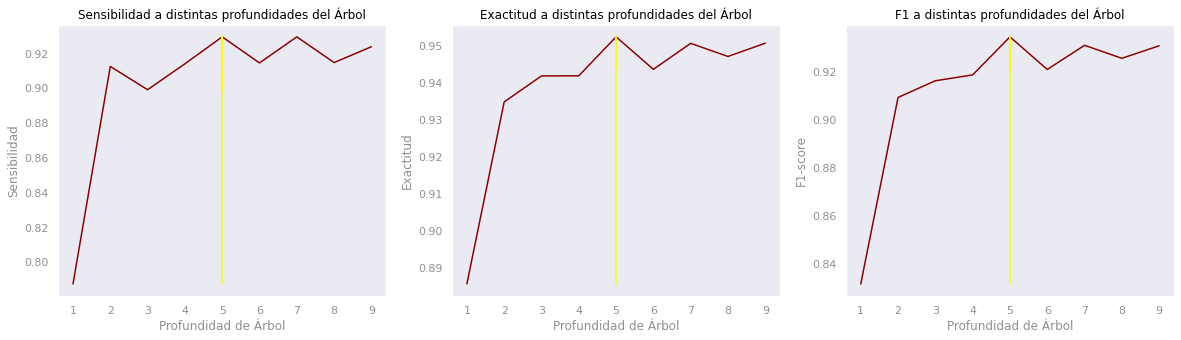

In [ ]:
#VALIDACIÓN CRUZADA PARA VARIAS PROFUNDIDADES DE ÁRBOL

# PRUEBA DE PROFUNDIDAD DE ÁRBOL
deepMinimo = 1
deepMaximo = 10
deepPaso = 1

recallList = []
ACCList = []
F1List = []

deeps = np.array(range(deepMinimo,deepMaximo,deepPaso))

for deep in range(deepMinimo,deepMaximo,deepPaso):
  model_DT1 = DecisionTreeClassifier(criterion = "gini", max_depth = deep, random_state = 1)
  model_DT1.fit(X_train_1, y_train_1)

  #CREAR LOS DISTINTOS SUBCONJUNTOS DE ENTRENAMIENTO Y TESTING
  cv = KFold(n_splits = 10, shuffle = True, random_state = 1)
  scores = cross_val_score(model_DT1, X1, y1, scoring = "recall", cv = cv)
  scoresACC = cross_val_score(model_DT1, X1, y1, scoring = "accuracy", cv = cv)
  scoresF1 = cross_val_score(model_DT1, X1, y1, scoring = "f1", cv = cv)

  recallList.append(np.mean(scores))
  ACCList.append(np.mean(scoresACC))
  F1List.append(np.mean(scoresF1))

  print("Para una profundidad de Árbol de ", str(deep), " sensibilidad:", np.mean(scores), ", exactitud: ", np.mean(scoresACC), ", F1_score: ", np.mean(scoresF1))

recall = np.array(recallList)
ACC = np.array(ACCList)
F1 = np.array(F1List)

fig, axs = plt.subplots(1,3,figsize = (20,5))
axs[0].plot(deeps, recall, c = "darkred")
axs[0].plot(5*np.ones_like(recall),recall, c = "yellow")
axs[0].set_title("Sensibilidad a distintas profundidades del Árbol")
axs[0].set_xlabel("Profundidad de Árbol")
axs[0].set_ylabel("Sensibilidad")
axs[0].set_xticks(deeps)
axs[0].grid()

axs[1].plot(deeps, ACC, c = "darkred")
axs[1].plot(5*np.ones_like(ACC),ACC, c = "yellow")
axs[1].set_title("Exactitud a distintas profundidades del Árbol")
axs[1].set_xlabel("Profundidad de Árbol")
axs[1].set_ylabel("Exactitud")
axs[1].set_xticks(deeps)
axs[1].grid()

axs[2].plot(deeps, F1, c = "darkred")
axs[2].plot(5*np.ones_like(F1),F1, c = "yellow")
axs[2].set_title("F1 a distintas profundidades del Árbol")
axs[2].set_xlabel("Profundidad de Árbol")
axs[2].set_ylabel("F1-score")
axs[2].set_xticks(deeps)
axs[2].grid()

In [ ]:
model_DT1 = DecisionTreeClassifier(criterion = "gini", max_depth = 5, random_state = 1)
model_DT1.fit(X_train_1, y_train_1)

predict_train_dt1 = model_DT1.predict_proba(X_train_1)[:,1]
predict_test_dt1 = model_DT1.predict_proba(X_test_1)[:,1]

print("auc on training in DecisionTree data : {:.3f}".format(roc_auc_score(y_train_1, predict_train_dt1) ))
print("auc on testing in DecisionTree  data : {:.3f}".format(roc_auc_score(y_test_1, predict_test_dt1) ))

auc on training in DecisionTree data : 0.995
auc on testing in DecisionTree  data : 0.887


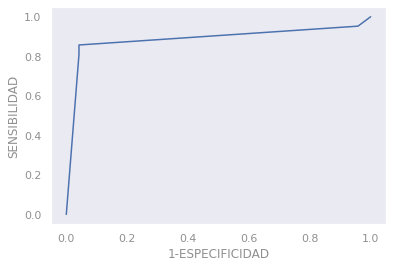

In [ ]:
espec_1dt1, sensdt1, umbralesdt1 = roc_curve(y_test_1,predict_test_dt1)
plt.plot(espec_1dt1,sensdt1)
plt.xlabel("1-ESPECIFICIDAD")
plt.ylabel("SENSIBILIDAD")
plt.grid()
plt.show()

In [ ]:
list(zip(umbralesdt1,sensdt1,espec_1dt1))

[(2.0, 0.0, 0.0),
 (1.0, 0.8095238095238095, 0.041666666666666664),
 (0.75, 0.8571428571428571, 0.041666666666666664),
 (0.008032128514056224, 0.9523809523809523, 0.9583333333333334),
 (0.0, 1.0, 1.0)]

In [ ]:
# PARÁMETRO DE VALIDACIÓN: SENSIBILIDAD
clasificacion_predict_train_dt1 = np.where(predict_train_dt1<0.75, 0, 1)
clasificacion_predict_test_dt1 = np.where(predict_test_dt1<0.75, 0, 1)

print("accuracy on training in DecisionTreeClassifier data : {:.3f}".format(recall_score(y_train_1, clasificacion_predict_train_dt1)))
print("accuracy on testing in DecisionTreeClassifier  data : {:.3f}".format(recall_score(y_test_1,clasificacion_predict_test_dt1)))

accuracy on training in DecisionTreeClassifier data : 0.982
accuracy on testing in DecisionTreeClassifier  data : 0.857


In [ ]:
# PARÁMETRO DE VALIDACIÓN: EXACTITUD
clasificacion_predict_train_dt1 = np.where(predict_train_dt1<0.75, 0, 1)
clasificacion_predict_test_dt1 = np.where(predict_test_dt1<0.75, 0, 1)

print("accuracy on training in DecisionTreeClassifier data : {:.3f}".format(accuracy_score(y_train_1, clasificacion_predict_train_dt1)))
print("accuracy on testing in DecisionTreeClassifier  data : {:.3f}".format(accuracy_score(y_test_1,clasificacion_predict_test_dt1)))

accuracy on training in DecisionTreeClassifier data : 0.991
accuracy on testing in DecisionTreeClassifier  data : 0.921


In [ ]:
# PARÁMETRO DE VALIDACIÓN: EXACTITUD
clasificacion_predict_train_dt1 = np.where(predict_train_dt1<0.75, 0, 1)
clasificacion_predict_test_dt1 = np.where(predict_test_dt1<0.75, 0, 1)

print("accuracy on training in DecisionTreeClassifier data : {:.3f}".format(f1_score(y_train_1, clasificacion_predict_train_dt1)))
print("accuracy on testing in DecisionTreeClassifier  data : {:.3f}".format(f1_score(y_test_1,clasificacion_predict_test_dt1)))

accuracy on training in DecisionTreeClassifier data : 0.988
accuracy on testing in DecisionTreeClassifier  data : 0.889


### <B> 6.2.2 PARA VARIABLES EXPLICATIVAS CON CORRELACIÓN DE 0.8 PARA ABAJO </B>

Para una profundidad de Árbol de  1  sensibilidad: 0.9048680976447162 , exactitud:  0.9121553884711779 , F1_score:  0.8853740949635818
Para una profundidad de Árbol de  2  sensibilidad: 0.9065205664125437 , exactitud:  0.9226190476190474 , F1_score:  0.8960473086627874
Para una profundidad de Árbol de  3  sensibilidad: 0.9157010026810808 , exactitud:  0.931422305764411 , F1_score:  0.9075827672739024
Para una profundidad de Árbol de  4  sensibilidad: 0.9242080075217105 , exactitud:  0.938471177944862 , F1_score:  0.9167411239836122
Para una profundidad de Árbol de  5  sensibilidad: 0.9331012881541214 , exactitud:  0.9385025062656641 , F1_score:  0.9178596331664378
Para una profundidad de Árbol de  6  sensibilidad: 0.9022957737286716 , exactitud:  0.931484962406015 , F1_score:  0.9040077932237779
Para una profundidad de Árbol de  7  sensibilidad: 0.9041264373442324 , exactitud:  0.931484962406015 , F1_score:  0.9059363105828095
Para una profundidad de Árbol de  8  sensibilidad: 0.908474

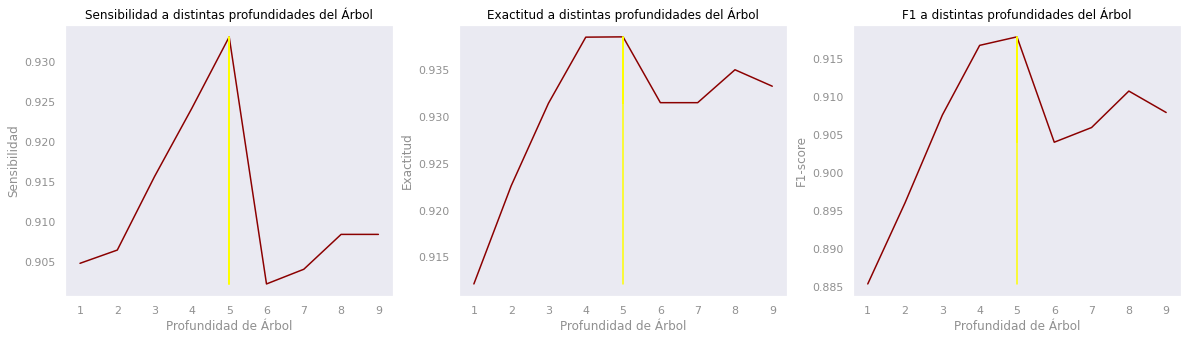

In [ ]:
#VALIDACIÓN CRUZADA PARA VARIAS PROFUNDIDADES DE ÁRBOL

# PRUEBA DE PROFUNDIDAD DE ÁRBOL
deepMinimo = 1
deepMaximo = 10
deepPaso = 1

recallList = []
ACCList = []
F1List = []

deeps = np.array(range(deepMinimo,deepMaximo,deepPaso))

for deep in range(deepMinimo,deepMaximo,deepPaso):
  model_DT2 = DecisionTreeClassifier(criterion = "gini", max_depth = deep, random_state = 1)
  model_DT2.fit(X_train_2, y_train_2)

  #CREAR LOS DISTINTOS SUBCONJUNTOS DE ENTRENAMIENTO Y TESTING
  cv = KFold(n_splits = 10, shuffle = True, random_state = 1)
  scores = cross_val_score(model_DT2, X2, y2, scoring = "recall", cv = cv)
  scoresACC = cross_val_score(model_DT2, X2, y2, scoring = "accuracy", cv = cv)
  scoresF1 = cross_val_score(model_DT2, X2, y2, scoring = "f1", cv = cv)

  recallList.append(np.mean(scores))
  ACCList.append(np.mean(scoresACC))
  F1List.append(np.mean(scoresF1))

  print("Para una profundidad de Árbol de ", str(deep), " sensibilidad:", np.mean(scores), ", exactitud: ", np.mean(scoresACC), ", F1_score: ", np.mean(scoresF1))

recall = np.array(recallList)
ACC = np.array(ACCList)
F1 = np.array(F1List)

fig, axs = plt.subplots(1,3,figsize = (20,5))
axs[0].plot(deeps, recall, c = "darkred")
axs[0].plot(5*np.ones_like(recall),recall, c = "yellow")
axs[0].set_title("Sensibilidad a distintas profundidades del Árbol")
axs[0].set_xlabel("Profundidad de Árbol")
axs[0].set_ylabel("Sensibilidad")
axs[0].set_xticks(deeps)
axs[0].grid()

axs[1].plot(deeps, ACC, c = "darkred")
axs[1].plot(5*np.ones_like(ACC),ACC, c = "yellow")
axs[1].set_title("Exactitud a distintas profundidades del Árbol")
axs[1].set_xlabel("Profundidad de Árbol")
axs[1].set_ylabel("Exactitud")
axs[1].set_xticks(deeps)
axs[1].grid()

axs[2].plot(deeps, F1, c = "darkred")
axs[2].plot(5*np.ones_like(F1),F1, c = "yellow")
axs[2].set_title("F1 a distintas profundidades del Árbol")
axs[2].set_xlabel("Profundidad de Árbol")
axs[2].set_ylabel("F1-score")
axs[2].set_xticks(deeps)
axs[2].grid()

In [ ]:
model_DT2 = DecisionTreeClassifier(criterion = "gini", max_depth = 5, random_state = 1)
model_DT2.fit(X_train_2, y_train_2)

predict_train_dt2 = model_DT2.predict_proba(X_train_2)[:,1]
predict_test_dt2 = model_DT2.predict_proba(X_test_2)[:,1]

print("auc on training in DecisionTree data : {:.3f}".format(roc_auc_score(y_train_2, predict_train_dt2)))
print("auc on testing in DecisionTree  data : {:.3f}".format(roc_auc_score(y_test_2, predict_test_dt2)))

auc on training in DecisionTree data : 0.996
auc on testing in DecisionTree  data : 0.933


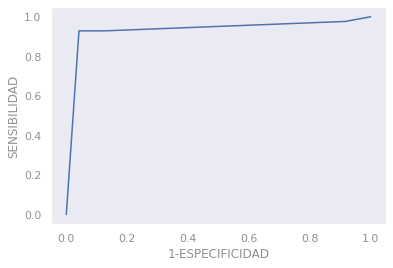

In [ ]:
espec_1dt2, sensdt2, umbralesdt2 = roc_curve(y_test_2,predict_test_dt2)
plt.plot(espec_1dt2,sensdt2)
plt.xlabel("1-ESPECIFICIDAD")
plt.ylabel("SENSIBILIDAD")
plt.grid()
plt.show()

In [ ]:
list(zip(umbralesdt2,sensdt2,espec_1dt2))

[(2.0, 0.0, 0.0),
 (1.0, 0.9285714285714286, 0.041666666666666664),
 (0.125, 0.9285714285714286, 0.06944444444444445),
 (0.07142857142857142, 0.9285714285714286, 0.125),
 (0.0045045045045045045, 0.9761904761904762, 0.9166666666666666),
 (0.0, 1.0, 1.0)]

In [ ]:
# PARÁMETRO DE VALIDACIÓN: SENSIBILIDAD
clasificacion_predict_train_dt2 = np.where(predict_train_dt2<0.125, 0, 1)
clasificacion_predict_test_dt2 = np.where(predict_test_dt2<0.125, 0, 1)

print("accuracy on training in DecisionTreeClassifier data : {:.3f}".format(recall_score(y_train_2, clasificacion_predict_train_dt2)))
print("accuracy on testing in DecisionTreeClassifier  data : {:.3f}".format(recall_score(y_test_2,clasificacion_predict_test_dt2)))

accuracy on training in DecisionTreeClassifier data : 0.982
accuracy on testing in DecisionTreeClassifier  data : 0.929


In [ ]:
print("accuracy on training in DecisionTreeClassifier data : {:.3f}".format(accuracy_score(y_train_2, clasificacion_predict_train_dt2)))
print("accuracy on testing in DecisionTreeClassifier  data : {:.3f}".format(accuracy_score(y_test_2,clasificacion_predict_test_dt2)))

accuracy on training in DecisionTreeClassifier data : 0.976
accuracy on testing in DecisionTreeClassifier  data : 0.930


In [ ]:
print("accuracy on training in DecisionTreeClassifier data : {:.3f}".format(f1_score(y_train_2, clasificacion_predict_train_dt2)))
print("accuracy on testing in DecisionTreeClassifier  data : {:.3f}".format(f1_score(y_test_2,clasificacion_predict_test_dt2)))

accuracy on training in DecisionTreeClassifier data : 0.968
accuracy on testing in DecisionTreeClassifier  data : 0.907


### <B> 6.3 MODELO DE BOSQUE ALEATORIO </B>

### <B> 6.3.1 PARA VARIABLES EXPLICATIVAS CON CORRELACIÓN DE 0.9 PARA ABAJO </B>

Para una cantidad de estimadores de  10  sensibilidad: 0.9052821763196646 , exactitud:  0.9420112781954888 , F1_score:  0.9200350614938397
Para una cantidad de estimadores de  30  sensibilidad: 0.9113456886811309 , exactitud:  0.9455200501253133 , F1_score:  0.925249407967178
Para una cantidad de estimadores de  50  sensibilidad: 0.9200413408550439 , exactitud:  0.9542919799498746 , F1_score:  0.9368203252699694
Para una cantidad de estimadores de  70  sensibilidad: 0.9243891669420004 , exactitud:  0.9525062656641603 , F1_score:  0.9347145990179018
Para una cantidad de estimadores de  90  sensibilidad: 0.9243891669420004 , exactitud:  0.9560463659147869 , F1_score:  0.9390425474921915
Para una cantidad de estimadores de  110  sensibilidad: 0.9285558336086671 , exactitud:  0.9578007518796993 , F1_score:  0.9412466291248446
Para una cantidad de estimadores de  130  sensibilidad: 0.9285558336086671 , exactitud:  0.9578007518796993 , F1_score:  0.9412466291248446
Para una cantidad de estim

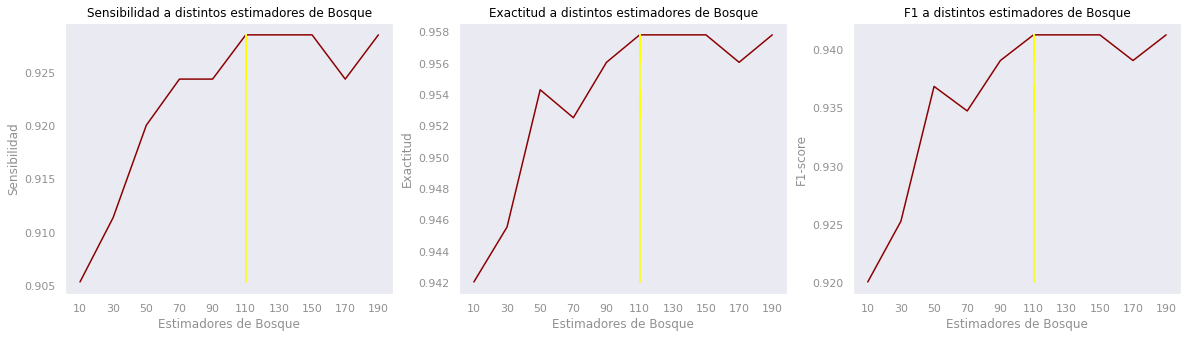

In [ ]:
#VALIDACIÓN CRUZADA PARA VARIAS CANTIDADES DE ESTIMADORES

# PRUEBA DE ESTIMADORES DE BOSQUE
estimadorMinimo = 10
estimadorMaximo = 200
estimadorPaso = 20

recallList = []
ACCList = []
F1List = []

estimadores = np.array(range(estimadorMinimo,estimadorMaximo,estimadorPaso))

for estimador in range(estimadorMinimo,estimadorMaximo,estimadorPaso):
  model_RF1 = RandomForestClassifier(criterion = 'gini', n_estimators = estimador, random_state = 1, n_jobs = 2)
  model_RF1.fit(X_train_1, y_train_1)

  #CREAR LOS DISTINTOS SUBCONJUNTOS DE ENTRENAMIENTO Y TESTING
  cv = KFold(n_splits = 10, shuffle = True, random_state = 1)
  scores = cross_val_score(model_RF1, X1, y1, scoring = "recall", cv = cv, n_jobs = 2)
  scoresACC = cross_val_score(model_RF1, X1, y1, scoring = "accuracy", cv = cv, n_jobs = 2)
  scoresF1 = cross_val_score(model_RF1, X1, y1, scoring = "f1", cv = cv, n_jobs = 2)

  recallList.append(np.mean(scores))
  ACCList.append(np.mean(scoresACC))
  F1List.append(np.mean(scoresF1))

  print("Para una cantidad de estimadores de ", str(estimador), " sensibilidad:", np.mean(scores), ", exactitud: ", np.mean(scoresACC), ", F1_score: ", np.mean(scoresF1))

recall = np.array(recallList)
ACC = np.array(ACCList)
F1 = np.array(F1List)

fig, axs = plt.subplots(1,3,figsize = (20,5))
axs[0].plot(estimadores, recall, c = "darkred")
axs[0].plot(110*np.ones_like(recall),recall, c = "yellow")
axs[0].set_title("Sensibilidad a distintos estimadores de Bosque")
axs[0].set_xlabel("Estimadores de Bosque")
axs[0].set_ylabel("Sensibilidad")
axs[0].set_xticks(estimadores)
axs[0].grid()

axs[1].plot(estimadores, ACC, c = "darkred")
axs[1].plot(110*np.ones_like(ACC),ACC, c = "yellow")
axs[1].set_title("Exactitud a distintos estimadores de Bosque")
axs[1].set_xlabel("Estimadores de Bosque")
axs[1].set_ylabel("Exactitud")
axs[1].set_xticks(estimadores)
axs[1].grid()

axs[2].plot(estimadores, F1, c = "darkred")
axs[2].plot(110*np.ones_like(F1),F1, c = "yellow")
axs[2].set_title("F1 a distintos estimadores de Bosque")
axs[2].set_xlabel("Estimadores de Bosque")
axs[2].set_ylabel("F1-score")
axs[2].set_xticks(estimadores)
axs[2].grid()

In [ ]:
model_RF1 = RandomForestClassifier(criterion = 'gini', n_estimators = 110, random_state = 1, n_jobs = 2)
model_RF1.fit(X_train_1, y_train_1)

predict_train_rf1 = model_RF1.predict_proba(X_train_1)[:,1]
predict_test_rf1 = model_RF1.predict_proba(X_test_1)[:,1]

print("auc on training in DecisionTree data : {:.3f}".format(roc_auc_score(y_train_1, predict_train_rf1)))
print("auc on testing in DecisionTree  data : {:.3f}".format(roc_auc_score(y_test_1, predict_test_rf1)))

auc on training in DecisionTree data : 1.000
auc on testing in DecisionTree  data : 0.993


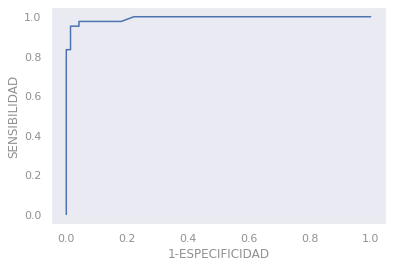

In [ ]:
espec_1rf1, sensrf1, umbralesrf1 = roc_curve(y_test_1,predict_test_rf1)
plt.plot(espec_1rf1,sensrf1)
plt.xlabel("1-ESPECIFICIDAD")
plt.ylabel("SENSIBILIDAD")
plt.grid()
plt.show()

In [ ]:
list(zip(umbralesrf1,sensrf1,espec_1rf1))

[(2.0, 0.0, 0.0),
 (1.0, 0.3333333333333333, 0.0),
 (0.990909090909091, 0.4523809523809524, 0.0),
 (0.9818181818181818, 0.5476190476190477, 0.0),
 (0.9363636363636364, 0.5952380952380952, 0.0),
 (0.9272727272727272, 0.6666666666666666, 0.0),
 (0.9090909090909091, 0.6904761904761905, 0.0),
 (0.8727272727272727, 0.7619047619047619, 0.0),
 (0.8090909090909091, 0.8333333333333334, 0.0),
 (0.7363636363636363, 0.8333333333333334, 0.013888888888888888),
 (0.6727272727272727, 0.8809523809523809, 0.013888888888888888),
 (0.36363636363636365, 0.9523809523809523, 0.013888888888888888),
 (0.32727272727272727, 0.9523809523809523, 0.041666666666666664),
 (0.3181818181818182, 0.9761904761904762, 0.041666666666666664),
 (0.20909090909090908, 0.9761904761904762, 0.06944444444444445),
 (0.19090909090909092, 0.9761904761904762, 0.09722222222222222),
 (0.08181818181818182, 0.9761904761904762, 0.18055555555555555),
 (0.06363636363636363, 1.0, 0.2222222222222222),
 (0.03636363636363636, 1.0, 0.2638888888888

In [ ]:
# PARÁMETRO DE VALIDACIÓN: SENSIBILIDAD
clasificacion_predict_train_rf1 = np.where(predict_train_rf1<0.318, 0, 1)
clasificacion_predict_test_rf1 = np.where(predict_test_rf1<0.318, 0, 1)

print("accuracy on training in DecisionTreeClassifier data : {:.3f}".format(recall_score(y_train_1, clasificacion_predict_train_rf1)))
print("accuracy on testing in DecisionTreeClassifier  data : {:.3f}".format(recall_score(y_test_1,clasificacion_predict_test_rf1)))

accuracy on training in DecisionTreeClassifier data : 1.000
accuracy on testing in DecisionTreeClassifier  data : 0.976


In [ ]:
# PARÁMETRO DE VALIDACIÓN: EXACTITUD
print("accuracy on training in DecisionTreeClassifier data : {:.3f}".format(accuracy_score(y_train_1, clasificacion_predict_train_rf1)))
print("accuracy on testing in DecisionTreeClassifier  data : {:.3f}".format(accuracy_score(y_test_1,clasificacion_predict_test_rf1)))

accuracy on training in DecisionTreeClassifier data : 1.000
accuracy on testing in DecisionTreeClassifier  data : 0.965


In [ ]:
# PARÁMETRO DE VALIDACIÓN: F1-SCORE
print("accuracy on training in DecisionTreeClassifier data : {:.3f}".format(f1_score(y_train_1, clasificacion_predict_train_rf1)))
print("accuracy on testing in DecisionTreeClassifier  data : {:.3f}".format(f1_score(y_test_1,clasificacion_predict_test_rf1)))

accuracy on training in DecisionTreeClassifier data : 1.000
accuracy on testing in DecisionTreeClassifier  data : 0.953


### <B> 6.3.2 PARA VARIABLES EXPLICATIVAS CON CORRELACIÓN DE 0.8 PARA ABAJO </B>

Para una cantidad de estimadores de  10  sensibilidad: 0.9020547984119796 , exactitud:  0.9472744360902257 , F1_score:  0.9267327617033164
Para una cantidad de estimadores de  20  sensibilidad: 0.9433314671822546 , exactitud:  0.9613408521303256 , F1_score:  0.9466689196632876
Para una cantidad de estimadores de  30  sensibilidad: 0.9342217363333931 , exactitud:  0.9595864661654134 , F1_score:  0.9441366199216855
Para una cantidad de estimadores de  40  sensibilidad: 0.9385695624203498 , exactitud:  0.9648496240601503 , F1_score:  0.9514216753171318
Para una cantidad de estimadores de  50  sensibilidad: 0.9385695624203498 , exactitud:  0.963095238095238 , F1_score:  0.9493075104122692
Para una cantidad de estimadores de  60  sensibilidad: 0.9235774786303119 , exactitud:  0.9578320802005011 , F1_score:  0.9413465522446469
Para una cantidad de estimadores de  70  sensibilidad: 0.9342217363333931 , exactitud:  0.9613408521303256 , F1_score:  0.9469188276664436
Para una cantidad de estimad

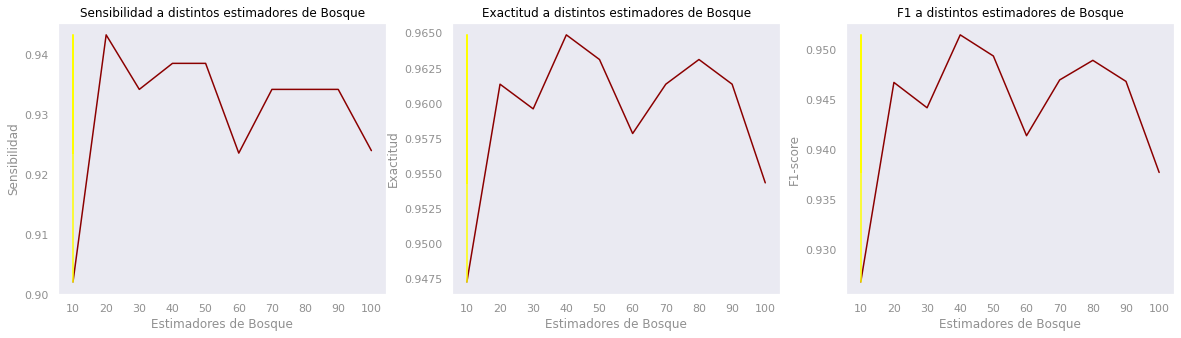

In [ ]:
#VALIDACIÓN CRUZADA PARA VARIAS CANTIDADES DE ESTIMADORES

# PRUEBA DE ESTIMADORES DE BOSQUE
estimadorMinimo = 10
estimadorMaximo = 110
estimadorPaso = 10

recallList = []
ACCList = []
F1List = []

estimadores = np.array(range(estimadorMinimo,estimadorMaximo,estimadorPaso))

for estimador in range(estimadorMinimo,estimadorMaximo,estimadorPaso):
  model_RF2 = RandomForestClassifier(criterion = 'gini', n_estimators = estimador, random_state = 1, n_jobs = 2)
  model_RF2.fit(X_train_2, y_train_2)

  #CREAR LOS DISTINTOS SUBCONJUNTOS DE ENTRENAMIENTO Y TESTING
  cv = KFold(n_splits = 10, shuffle = True, random_state = 1)
  scores = cross_val_score(model_RF2, X2, y2, scoring = "recall", cv = cv, n_jobs = 2)
  scoresACC = cross_val_score(model_RF2, X2, y2, scoring = "accuracy", cv = cv, n_jobs = 2)
  scoresF1 = cross_val_score(model_RF2, X2, y2, scoring = "f1", cv = cv, n_jobs = 2)

  recallList.append(np.mean(scores))
  ACCList.append(np.mean(scoresACC))
  F1List.append(np.mean(scoresF1))

  print("Para una cantidad de estimadores de ", str(estimador), " sensibilidad:", np.mean(scores), ", exactitud: ", np.mean(scoresACC), ", F1_score: ", np.mean(scoresF1))

recall = np.array(recallList)
ACC = np.array(ACCList)
F1 = np.array(F1List)

fig, axs = plt.subplots(1,3,figsize = (20,5))
axs[0].plot(estimadores, recall, c = "darkred")
axs[0].plot(10*np.ones_like(recall),recall, c = "yellow")
axs[0].set_title("Sensibilidad a distintos estimadores de Bosque")
axs[0].set_xlabel("Estimadores de Bosque")
axs[0].set_ylabel("Sensibilidad")
axs[0].set_xticks(estimadores)
axs[0].grid()

axs[1].plot(estimadores, ACC, c = "darkred")
axs[1].plot(10*np.ones_like(ACC),ACC, c = "yellow")
axs[1].set_title("Exactitud a distintos estimadores de Bosque")
axs[1].set_xlabel("Estimadores de Bosque")
axs[1].set_ylabel("Exactitud")
axs[1].set_xticks(estimadores)
axs[1].grid()

axs[2].plot(estimadores, F1, c = "darkred")
axs[2].plot(10*np.ones_like(F1),F1, c = "yellow")
axs[2].set_title("F1 a distintos estimadores de Bosque")
axs[2].set_xlabel("Estimadores de Bosque")
axs[2].set_ylabel("F1-score")
axs[2].set_xticks(estimadores)
axs[2].grid()

In [ ]:
model_RF2 = RandomForestClassifier(criterion = 'gini', n_estimators = 20, random_state = 1, n_jobs = 2)
model_RF2.fit(X_train_2, y_train_2)

predict_train_rf2 = model_RF2.predict_proba(X_train_2)[:,1]
predict_test_rf2 = model_RF2.predict_proba(X_test_2)[:,1]

print("auc on training in DecisionTree data : {:.3f}".format(roc_auc_score(y_train_2, predict_train_rf2)))
print("auc on testing in DecisionTree  data : {:.3f}".format(roc_auc_score(y_test_2, predict_test_rf2)))

auc on training in DecisionTree data : 1.000
auc on testing in DecisionTree  data : 0.989


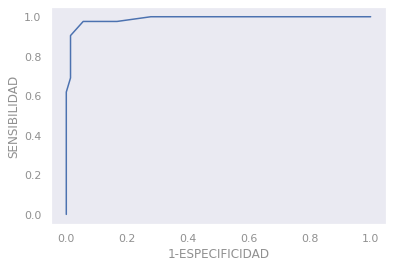

In [ ]:
espec_1rf2, sensrf2, umbralesrf2 = roc_curve(y_test_2,predict_test_rf2)
plt.plot(espec_1rf2,sensrf2)
plt.xlabel("1-ESPECIFICIDAD")
plt.ylabel("SENSIBILIDAD")
plt.grid()
plt.show()

In [ ]:
list(zip(umbralesrf2,sensrf2,espec_1rf2))

[(2.0, 0.0, 0.0),
 (1.0, 0.5, 0.0),
 (0.95, 0.5952380952380952, 0.0),
 (0.9, 0.6190476190476191, 0.0),
 (0.85, 0.6904761904761905, 0.013888888888888888),
 (0.75, 0.7380952380952381, 0.013888888888888888),
 (0.7, 0.8333333333333334, 0.013888888888888888),
 (0.55, 0.9047619047619048, 0.013888888888888888),
 (0.3, 0.9761904761904762, 0.05555555555555555),
 (0.2, 0.9761904761904762, 0.125),
 (0.15, 0.9761904761904762, 0.16666666666666666),
 (0.1, 1.0, 0.2777777777777778),
 (0.05, 1.0, 0.4166666666666667),
 (0.0, 1.0, 1.0)]

In [ ]:
# PARÁMETRO DE VALIDACIÓN: SENSIBILIDAD
clasificacion_predict_train_rf2 = np.where(predict_train_rf2<0.3, 0, 1)
clasificacion_predict_test_rf2 = np.where(predict_test_rf2<0.3, 0, 1)

print("accuracy on training in DecisionTreeClassifier data : {:.3f}".format(recall_score(y_train_2, clasificacion_predict_train_rf2)))
print("accuracy on testing in DecisionTreeClassifier  data : {:.3f}".format(recall_score(y_test_2,clasificacion_predict_test_rf2)))

accuracy on training in DecisionTreeClassifier data : 1.000
accuracy on testing in DecisionTreeClassifier  data : 0.976


In [ ]:
# PARÁMETRO DE VALIDACIÓN: EXACTITUD
print("accuracy on training in DecisionTreeClassifier data : {:.3f}".format(accuracy_score(y_train_2, clasificacion_predict_train_rf2)))
print("accuracy on testing in DecisionTreeClassifier  data : {:.3f}".format(accuracy_score(y_test_2,clasificacion_predict_test_rf2)))

accuracy on training in DecisionTreeClassifier data : 0.998
accuracy on testing in DecisionTreeClassifier  data : 0.956


In [ ]:
# PARÁMETRO DE VALIDACIÓN: F1-SCORE
print("accuracy on training in DecisionTreeClassifier data : {:.3f}".format(f1_score(y_train_2, clasificacion_predict_train_rf2)))
print("accuracy on testing in DecisionTreeClassifier  data : {:.3f}".format(f1_score(y_test_2,clasificacion_predict_test_rf2)))

accuracy on training in DecisionTreeClassifier data : 0.997
accuracy on testing in DecisionTreeClassifier  data : 0.943


## <B> ETAPA 7: DETERMINACIÓN DE LA IMPORTANCIA DE VARIABLES (FEATURES IMPORTANCE) </B>

In [ ]:
#IMPORTAR DATASET

#df = pd.read_csv("/content/drive/MyDrive/brast-cancer-dataset.csv")
dfT = pd.read_csv("drive/My Drive/GRUPO_ESPECIALIZACION/brast-cancer-dataset.csv")
#"https://docs.google.com/spreadsheets/d/1iIYcz1s2zmqarC7-hKCTspwNjwOm5Nk1xsv-FTdr8_8/export?format=csv" exportado desde DMC
dfT = dfT.drop(columns = ['id', 'Unnamed: 32'])
dfT['diagnosis'] = dfT['diagnosis'].astype('category')

reemplazos = {"M" : 1,
             "B" : 0}

dfT['diagnosis'].replace(reemplazos, inplace = True)

dfT

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# Divisón entre Train y Test

XT=dfT.drop(['diagnosis'],axis=1)
yT=dfT[['diagnosis']]
X_trainT, X_testT, y_trainT, y_testT = train_test_split(XT,yT, test_size=0.20,random_state=1,stratify=yT)

### <B> 7.1 MODELO DE ÁRBOL DE DECISIONES </B>

Para una profundidad de Árbol de  1  sensibilidad: 0.7874628736454016 , exactitud:  0.8857142857142856 , F1_score:  0.8330258250777322
Para una profundidad de Árbol de  2  sensibilidad: 0.8733278426827356 , exactitud:  0.9226503759398497 , F1_score:  0.890165997957024
Para una profundidad de Árbol de  3  sensibilidad: 0.8739230807779738 , exactitud:  0.9225877192982456 , F1_score:  0.8927752936900635
Para una profundidad de Árbol de  4  sensibilidad: 0.8939454032080901 , exactitud:  0.9384398496240601 , F1_score:  0.9149407124892786
Para una profundidad de Árbol de  5  sensibilidad: 0.8937642437878001 , exactitud:  0.9314223057644112 , F1_score:  0.9037581937389383
Para una profundidad de Árbol de  6  sensibilidad: 0.8981120698747567 , exactitud:  0.9349310776942357 , F1_score:  0.9083036482843928
Para una profundidad de Árbol de  7  sensibilidad: 0.9066265626283799 , exactitud:  0.9401942355889725 , F1_score:  0.9152865924294495
Para una profundidad de Árbol de  8  sensibilidad: 0.909

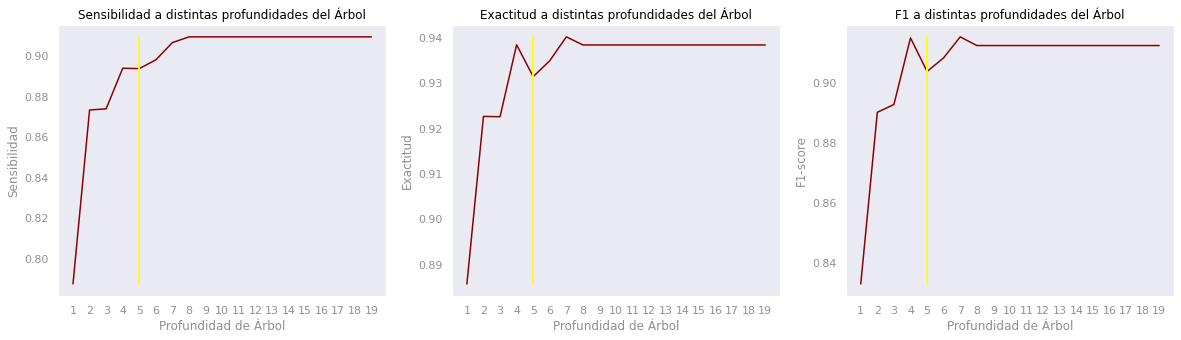

In [ ]:
#VALIDACIÓN CRUZADA PARA VARIAS PROFUNDIDADES DE ÁRBOL

# PRUEBA DE PROFUNDIDAD DE ÁRBOL
deepMinimo = 1
deepMaximo = 20
deepPaso = 1

recallList = []
ACCList = []
F1List = []

deeps = np.array(range(deepMinimo,deepMaximo,deepPaso))

for deep in range(deepMinimo,deepMaximo,deepPaso):
  model_DTT = DecisionTreeClassifier(criterion = "gini", max_depth = deep, random_state = 1)
  model_DTT.fit(X_trainT, y_trainT)

  #CREAR LOS DISTINTOS SUBCONJUNTOS DE ENTRENAMIENTO Y TESTING
  cv = KFold(n_splits = 10, shuffle = True, random_state = 1)
  scores = cross_val_score(model_DTT, XT, yT, scoring = "recall", cv = cv)
  scoresACC = cross_val_score(model_DTT, XT, yT, scoring = "accuracy", cv = cv)
  scoresF1 = cross_val_score(model_DTT, XT, yT, scoring = "f1", cv = cv)

  recallList.append(np.mean(scores))
  ACCList.append(np.mean(scoresACC))
  F1List.append(np.mean(scoresF1))

  print("Para una profundidad de Árbol de ", str(deep), " sensibilidad:", np.mean(scores), ", exactitud: ", np.mean(scoresACC), ", F1_score: ", np.mean(scoresF1))

recall = np.array(recallList)
ACC = np.array(ACCList)
F1 = np.array(F1List)

fig, axs = plt.subplots(1,3,figsize = (20,5))
axs[0].plot(deeps, recall, c = "darkred")
axs[0].plot(5*np.ones_like(recall),recall, c = "yellow")
axs[0].set_title("Sensibilidad a distintas profundidades del Árbol")
axs[0].set_xlabel("Profundidad de Árbol")
axs[0].set_ylabel("Sensibilidad")
axs[0].set_xticks(deeps)
axs[0].grid()

axs[1].plot(deeps, ACC, c = "darkred")
axs[1].plot(5*np.ones_like(ACC),ACC, c = "yellow")
axs[1].set_title("Exactitud a distintas profundidades del Árbol")
axs[1].set_xlabel("Profundidad de Árbol")
axs[1].set_ylabel("Exactitud")
axs[1].set_xticks(deeps)
axs[1].grid()

axs[2].plot(deeps, F1, c = "darkred")
axs[2].plot(5*np.ones_like(F1),F1, c = "yellow")
axs[2].set_title("F1 a distintas profundidades del Árbol")
axs[2].set_xlabel("Profundidad de Árbol")
axs[2].set_ylabel("F1-score")
axs[2].set_xticks(deeps)
axs[2].grid()

In [ ]:
model_DTT = DecisionTreeClassifier(criterion = "gini", max_depth = 7, random_state = 1)
model_DTT.fit(X_trainT, y_trainT)

predict_train_dtT = model_DTT.predict(X_trainT)
predict_test_dtT = model_DTT.predict(X_testT)

print("auc on training in DecisionTree data : {:.3f}".format(roc_auc_score(y_trainT, predict_train_dtT)))
print("auc on testing in DecisionTree  data : {:.3f}".format(roc_auc_score(y_testT, predict_test_dtT)))

auc on training in DecisionTree data : 1.000
auc on testing in DecisionTree  data : 0.925


In [ ]:
#espec_1dtT, sensdtT, umbralesdtT = roc_curve(y_testT,predict_test_dtT)
#plt.plot(espec_1dtT,sensdtT)
#plt.xlabel("1-ESPECIFICIDAD")
#plt.ylabel("SENSIBILIDAD")
#plt.grid()
#plt.show()

In [ ]:
#list(zip(umbralesdtT,sensdtT,espec_1dtT))

In [ ]:
# PARÁMETRO DE VALIDACIÓN: SENSIBILIDAD
#clasificacion_predict_train_dtT = np.where(predict_train_dtT<=1, 0, 1)
#clasificacion_predict_test_dtT = np.where(predict_test_dtT<=1, 0, 1)

print("accuracy on training in DecisionTreeClassifier data : {:.3f}".format(recall_score(y_trainT, predict_train_dtT)))
print("accuracy on testing in DecisionTreeClassifier  data : {:.3f}".format(recall_score(y_testT,predict_test_dtT)))

accuracy on training in DecisionTreeClassifier data : 1.000
accuracy on testing in DecisionTreeClassifier  data : 0.905


In [ ]:
print("accuracy on training in DecisionTreeClassifier data : {:.3f}".format(accuracy_score(y_trainT, predict_train_dtT)))
print("accuracy on testing in DecisionTreeClassifier  data : {:.3f}".format(accuracy_score(y_testT,predict_test_dtT)))

accuracy on training in DecisionTreeClassifier data : 1.000
accuracy on testing in DecisionTreeClassifier  data : 0.930


In [ ]:
print("accuracy on training in DecisionTreeClassifier data : {:.3f}".format(f1_score(y_trainT, predict_train_dtT)))
print("accuracy on testing in DecisionTreeClassifier  data : {:.3f}".format(f1_score(y_testT,predict_test_dtT)))

accuracy on training in DecisionTreeClassifier data : 1.000
accuracy on testing in DecisionTreeClassifier  data : 0.905


In [ ]:
## ordenando  las mejores variables
features = []
for feature in zip(XT.columns, model_DTT.feature_importances_):
    features.append(feature)
    
features_total = pd.DataFrame(features,columns=['Variables','Gain']).sort_values('Gain', ascending=False)
features_total

,Variables,Gain
22,perimeter_worst,0.689574
21,texture_worst,0.079149
27,concave points_worst,0.062381
17,concave points_se,0.045077
23,area_worst,0.037513
7,concave points_mean,0.025364
1,texture_mean,0.016695
19,fractal_dimension_se,0.009324
28,symmetry_worst,0.009142
16,concavity_se,0.008348


In [ ]:
explicacionDTT = np.add.accumulate(np.array(sorted(model_DTT.feature_importances_, reverse = True))*100)
explicacionDTT

array([ 68.95736657,  76.87230294,  83.11039131,  87.61813124,
        91.36947732,  93.90591953,  95.57545284,  96.50785738,
        97.42209714,  98.25686379,  99.07858722,  99.78292158,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        ])

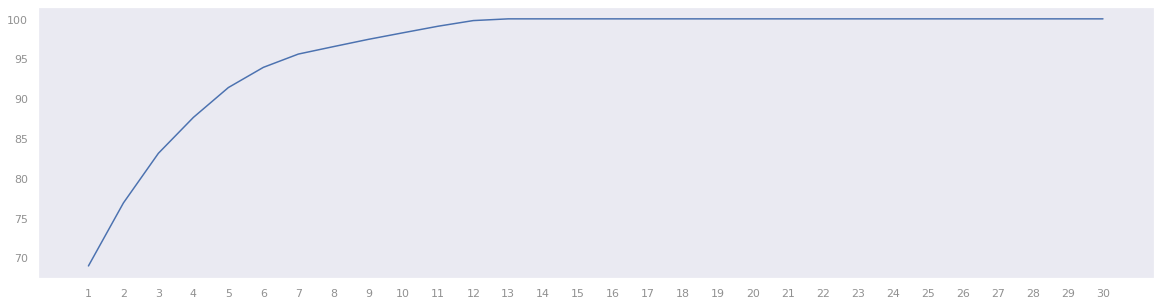

In [ ]:
plt.figure(figsize = (20,5))
plt.plot(list(range(1,31)),explicacionDTT)
plt.xticks(list(range(1,31)))
plt.grid()

In [ ]:
dfT_FITD = dfT.drop(columns = ['concavity_worst', 'compactness_worst','smoothness_worst','symmetry_se','radius_worst','radius_mean',
                                    'smoothness_se','perimeter_se','texture_se','fractal_dimension_mean','symmetry_mean','concavity_mean',
                                    'compactness_mean','smoothness_mean','area_mean','perimeter_mean','compactness_se',
                               'concavity_se','fractal_dimension_worst','radius_se','area_se',
                               'texture_mean','fractal_dimension_se','symmetry_worst'])
dfT_FITD

,diagnosis,concave points_mean,concave points_se,texture_worst,perimeter_worst,area_worst,concave points_worst
0,1,0.14710,0.01587,17.33,184.60,2019.0,0.2654
1,1,0.07017,0.01340,23.41,158.80,1956.0,0.1860
2,1,0.12790,0.02058,25.53,152.50,1709.0,0.2430
3,1,0.10520,0.01867,26.50,98.87,567.7,0.2575
4,1,0.10430,0.01885,16.67,152.20,1575.0,0.1625
...,...,...,...,...,...,...,...
564,1,0.13890,0.02454,26.40,166.10,2027.0,0.2216
565,1,0.09791,0.01678,38.25,155.00,1731.0,0.1628
566,1,0.05302,0.01557,34.12,126.70,1124.0,0.1418
567,1,0.15200,0.01664,39.42,184.60,1821.0,0.2650


In [ ]:
# Divisón entre Train y Test

X_FITD=dfT_FITD.drop(['diagnosis'],axis=1)
y_FITD=dfT[['diagnosis']]
X_trainT_FITD, X_testT_FITD, y_trainT_FITD, y_testT_FITD = train_test_split(X_FITD,y_FITD, test_size=0.20,random_state=1,stratify=y_FITD)

Para una profundidad de Árbol de  1  sensibilidad: 0.7846495744126649 , exactitud:  0.875187969924812 , F1_score:  0.8199344247522893
Para una profundidad de Árbol de  2  sensibilidad: 0.8789544411482089 , exactitud:  0.931422305764411 , F1_score:  0.9022200630099968
Para una profundidad de Árbol de  3  sensibilidad: 0.8810842060976668 , exactitud:  0.9296052631578947 , F1_score:  0.8998197948608201
Para una profundidad de Árbol de  4  sensibilidad: 0.8967587024408266 , exactitud:  0.9401315789473685 , F1_score:  0.9162986747185325
Para una profundidad de Árbol de  5  sensibilidad: 0.9068077220486698 , exactitud:  0.9471491228070175 , F1_score:  0.9280259457295355
Para una profundidad de Árbol de  6  sensibilidad: 0.9153222148022928 , exactitud:  0.9418859649122808 , F1_score:  0.9216621232572001
Para una profundidad de Árbol de  7  sensibilidad: 0.9111555481356263 , exactitud:  0.9366228070175439 , F1_score:  0.9139024860689913
Para una profundidad de Árbol de  8  sensibilidad: 0.9111

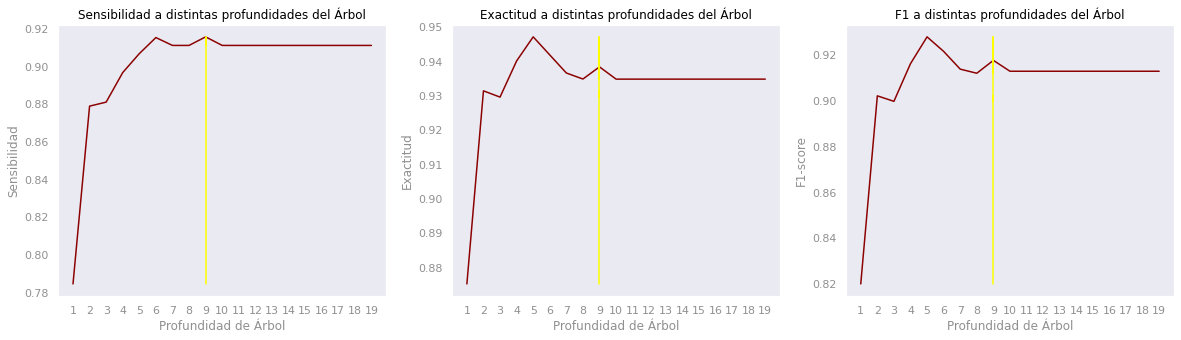

In [ ]:
#VALIDACIÓN CRUZADA PARA VARIAS PROFUNDIDADES DE ÁRBOL

# PRUEBA DE PROFUNDIDAD DE ÁRBOL
deepMinimo = 1
deepMaximo = 20
deepPaso = 1

recallList = []
ACCList = []
F1List = []

deeps = np.array(range(deepMinimo,deepMaximo,deepPaso))

for deep in range(deepMinimo,deepMaximo,deepPaso):
  model_DTT_FITD = DecisionTreeClassifier(criterion = "gini", max_depth = deep, random_state = 1)
  model_DTT_FITD.fit(X_trainT_FITD, y_trainT_FITD)

  #CREAR LOS DISTINTOS SUBCONJUNTOS DE ENTRENAMIENTO Y TESTING
  cv = KFold(n_splits = 10, shuffle = True, random_state = 1)
  scores = cross_val_score(model_DTT_FITD, X_FITD, y_FITD, scoring = "recall", cv = cv)
  scoresACC = cross_val_score(model_DTT_FITD, X_FITD, y_FITD, scoring = "accuracy", cv = cv)
  scoresF1 = cross_val_score(model_DTT_FITD, X_FITD, y_FITD, scoring = "f1", cv = cv)

  recallList.append(np.mean(scores))
  ACCList.append(np.mean(scoresACC))
  F1List.append(np.mean(scoresF1))

  print("Para una profundidad de Árbol de ", str(deep), " sensibilidad:", np.mean(scores), ", exactitud: ", np.mean(scoresACC), ", F1_score: ", np.mean(scoresF1))

recall = np.array(recallList)
ACC = np.array(ACCList)
F1 = np.array(F1List)

fig, axs = plt.subplots(1,3,figsize = (20,5))
axs[0].plot(deeps, recall, c = "darkred")
axs[0].plot(9*np.ones_like(recall),recall, c = "yellow")
axs[0].set_title("Sensibilidad a distintas profundidades del Árbol")
axs[0].set_xlabel("Profundidad de Árbol")
axs[0].set_ylabel("Sensibilidad")
axs[0].set_xticks(deeps)
axs[0].grid()

axs[1].plot(deeps, ACC, c = "darkred")
axs[1].plot(9*np.ones_like(ACC),ACC, c = "yellow")
axs[1].set_title("Exactitud a distintas profundidades del Árbol")
axs[1].set_xlabel("Profundidad de Árbol")
axs[1].set_ylabel("Exactitud")
axs[1].set_xticks(deeps)
axs[1].grid()

axs[2].plot(deeps, F1, c = "darkred")
axs[2].plot(9*np.ones_like(F1),F1, c = "yellow")
axs[2].set_title("F1 a distintas profundidades del Árbol")
axs[2].set_xlabel("Profundidad de Árbol")
axs[2].set_ylabel("F1-score")
axs[2].set_xticks(deeps)
axs[2].grid()

### <B> 7.2 MODELO DE BOSQUE ALEATORIO </B>

Para una cantidad de estimadores de  10  sensibilidad: 0.90758288857461 , exactitud:  0.9543233082706767 , F1_score:  0.9334430438842203
Para una cantidad de estimadores de  20  sensibilidad: 0.9196437312183038 , exactitud:  0.9542919799498746 , F1_score:  0.9368388426547505
Para una cantidad de estimadores de  30  sensibilidad: 0.9385695624203498 , exactitud:  0.9613408521303258 , F1_score:  0.9465740094487408
Para una cantidad de estimadores de  40  sensibilidad: 0.9383719339618519 , exactitud:  0.9613095238095237 , F1_score:  0.9470273312577063
Para una cantidad de estimadores de  50  sensibilidad: 0.9383719339618519 , exactitud:  0.9595551378446115 , F1_score:  0.9443245268157714
Para una cantidad de estimadores de  60  sensibilidad: 0.9425386006285186 , exactitud:  0.963063909774436 , F1_score:  0.9485725796600974
Para una cantidad de estimadores de  70  sensibilidad: 0.9383719339618519 , exactitud:  0.9613095238095237 , F1_score:  0.9464501306805058
Para una cantidad de estimador

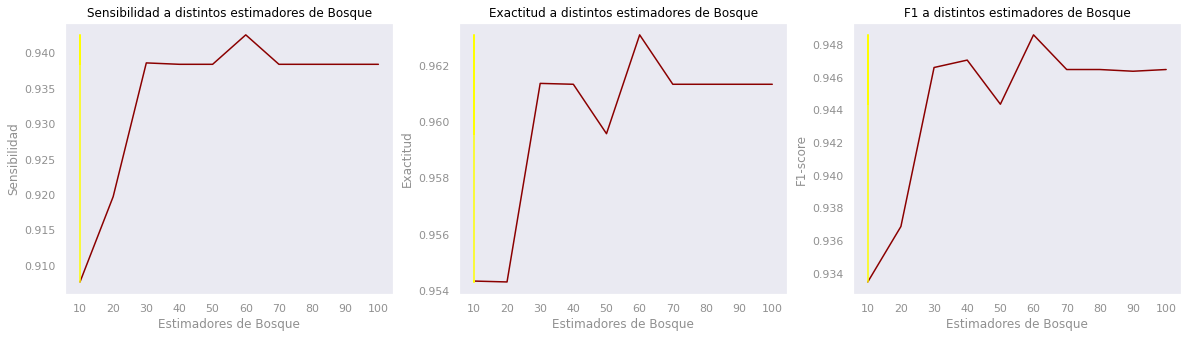

In [ ]:
#VALIDACIÓN CRUZADA PARA VARIAS CANTIDADES DE ESTIMADORES

# PRUEBA DE ESTIMADORES DE BOSQUE
estimadorMinimo = 10
estimadorMaximo = 110
estimadorPaso = 10

recallList = []
ACCList = []
F1List = []

estimadores = np.array(range(estimadorMinimo,estimadorMaximo,estimadorPaso))

for estimador in range(estimadorMinimo,estimadorMaximo,estimadorPaso):
  model_RFT = RandomForestClassifier(criterion = 'gini', n_estimators = estimador, random_state = 1, n_jobs = 2)
  model_RFT.fit(X_trainT, y_trainT)

  #CREAR LOS DISTINTOS SUBCONJUNTOS DE ENTRENAMIENTO Y TESTING
  cv = KFold(n_splits = 10, shuffle = True, random_state = 1)
  scores = cross_val_score(model_RFT, XT, yT, scoring = "recall", cv = cv, n_jobs = 2)
  scoresACC = cross_val_score(model_RFT, XT, yT, scoring = "accuracy", cv = cv, n_jobs = 2)
  scoresF1 = cross_val_score(model_RFT, XT, yT, scoring = "f1", cv = cv, n_jobs = 2)

  recallList.append(np.mean(scores))
  ACCList.append(np.mean(scoresACC))
  F1List.append(np.mean(scoresF1))

  print("Para una cantidad de estimadores de ", str(estimador), " sensibilidad:", np.mean(scores), ", exactitud: ", np.mean(scoresACC), ", F1_score: ", np.mean(scoresF1))

recall = np.array(recallList)
ACC = np.array(ACCList)
F1 = np.array(F1List)

fig, axs = plt.subplots(1,3,figsize = (20,5))
axs[0].plot(estimadores, recall, c = "darkred")
axs[0].plot(10*np.ones_like(recall),recall, c = "yellow")
axs[0].set_title("Sensibilidad a distintos estimadores de Bosque")
axs[0].set_xlabel("Estimadores de Bosque")
axs[0].set_ylabel("Sensibilidad")
axs[0].set_xticks(estimadores)
axs[0].grid()

axs[1].plot(estimadores, ACC, c = "darkred")
axs[1].plot(10*np.ones_like(ACC),ACC, c = "yellow")
axs[1].set_title("Exactitud a distintos estimadores de Bosque")
axs[1].set_xlabel("Estimadores de Bosque")
axs[1].set_ylabel("Exactitud")
axs[1].set_xticks(estimadores)
axs[1].grid()

axs[2].plot(estimadores, F1, c = "darkred")
axs[2].plot(10*np.ones_like(F1),F1, c = "yellow")
axs[2].set_title("F1 a distintos estimadores de Bosque")
axs[2].set_xlabel("Estimadores de Bosque")
axs[2].set_ylabel("F1-score")
axs[2].set_xticks(estimadores)
axs[2].grid()

In [ ]:
model_RFT = RandomForestClassifier(criterion = 'gini', n_estimators = 60, random_state = 1, n_jobs = 2)
model_RFT.fit(X_trainT, y_trainT)

predict_train_rfT = model_RFT.predict(X_trainT)
predict_test_rfT = model_RFT.predict(X_testT)

print("auc on training in DecisionTree data : {:.3f}".format(roc_auc_score(y_trainT, predict_train_rfT)))
print("auc on testing in DecisionTree  data : {:.3f}".format(roc_auc_score(y_testT, predict_test_rfT)))

auc on training in DecisionTree data : 1.000
auc on testing in DecisionTree  data : 0.945


In [ ]:
# PARÁMETRO DE VALIDACIÓN: SENSIBILIDAD
print("accuracy on training in DecisionTreeClassifier data : {:.3f}".format(recall_score(y_trainT,predict_train_rfT)))
print("accuracy on testing in DecisionTreeClassifier  data : {:.3f}".format(recall_score(y_testT,predict_test_rfT)))

accuracy on training in DecisionTreeClassifier data : 1.000
accuracy on testing in DecisionTreeClassifier  data : 0.905


In [ ]:
# PARÁMETRO DE VALIDACIÓN: EXACTITUD
print("accuracy on training in DecisionTreeClassifier data : {:.3f}".format(accuracy_score(y_trainT,predict_train_rfT)))
print("accuracy on testing in DecisionTreeClassifier  data : {:.3f}".format(accuracy_score(y_testT,predict_test_rfT)))

accuracy on training in DecisionTreeClassifier data : 1.000
accuracy on testing in DecisionTreeClassifier  data : 0.956


In [ ]:
## ordenando  las mejores variables
features = []
for feature in zip(XT.columns, model_RFT.feature_importances_):
    features.append(feature)
    
features_total = pd.DataFrame(features,columns=['Variables','Gain']).sort_values('Gain', ascending=False)
features_total

,Variables,Gain
23,area_worst,0.138039
20,radius_worst,0.122963
27,concave points_worst,0.105851
7,concave points_mean,0.090725
22,perimeter_worst,0.089858
6,concavity_mean,0.080228
3,area_mean,0.061026
0,radius_mean,0.052605
2,perimeter_mean,0.047565
26,concavity_worst,0.033693


In [ ]:
dfT_FIRF = dfT.drop(columns = ['fractal_dimension_worst', 'texture_se','smoothness_mean','concavity_se','perimeter_se','compactness_mean',
                               'symmetry_se','fractal_dimension_se','smoothness_se','symmetry_mean','compactness_se','concave points_se','fractal_dimension_mean'])
dfT_FIRF

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,1,17.99,10.38,122.80,1001.0,0.30010,0.14710,1.0950,153.40,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601
1,1,20.57,17.77,132.90,1326.0,0.08690,0.07017,0.5435,74.08,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750
2,1,19.69,21.25,130.00,1203.0,0.19740,0.12790,0.7456,94.03,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613
3,1,11.42,20.38,77.58,386.1,0.24140,0.10520,0.4956,27.23,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638
4,1,20.29,14.34,135.10,1297.0,0.19800,0.10430,0.7572,94.44,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.24390,0.13890,1.1760,158.70,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060
565,1,20.13,28.25,131.20,1261.0,0.14400,0.09791,0.7655,99.04,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572
566,1,16.60,28.08,108.30,858.1,0.09251,0.05302,0.4564,48.55,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218
567,1,20.60,29.33,140.10,1265.0,0.35140,0.15200,0.7260,86.22,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087


In [ ]:
# Divisón entre Train y Test

X_FIRF=dfT_FIRF.drop(['diagnosis'],axis=1)
y_FIRF=dfT[['diagnosis']]
X_trainT_FIRF, X_testT_FIRF, y_trainT_FIRF, y_testT_FIRF = train_test_split(X_FIRF,y_FIRF, test_size=0.20,random_state=1,stratify=y_FIRF)

Para una cantidad de estimadores de  10  sensibilidad: 0.9224734994892486 , exactitud:  0.9578634085213033 , F1_score:  0.9400598677807979
Para una cantidad de estimadores de  20  sensibilidad: 0.9207994701937359 , exactitud:  0.9490288220551377 , F1_score:  0.9299239080702495
Para una cantidad de estimadores de  30  sensibilidad: 0.9296927508261469 , exactitud:  0.9525689223057643 , F1_score:  0.9351421780833545
Para una cantidad de estimadores de  40  sensibilidad: 0.93838840300006 , exactitud:  0.9613408521303256 , F1_score:  0.946713095386146
Para una cantidad de estimadores de  50  sensibilidad: 0.9338429484546055 , exactitud:  0.9595551378446114 , F1_score:  0.9441579269773189
Para una cantidad de estimadores de  60  sensibilidad: 0.9427362290870166 , exactitud:  0.9648496240601503 , F1_score:  0.9511575398305905
Para una cantidad de estimadores de  70  sensibilidad: 0.947084055173973 , exactitud:  0.9648496240601503 , F1_score:  0.95126559714795
Para una cantidad de estimadores 

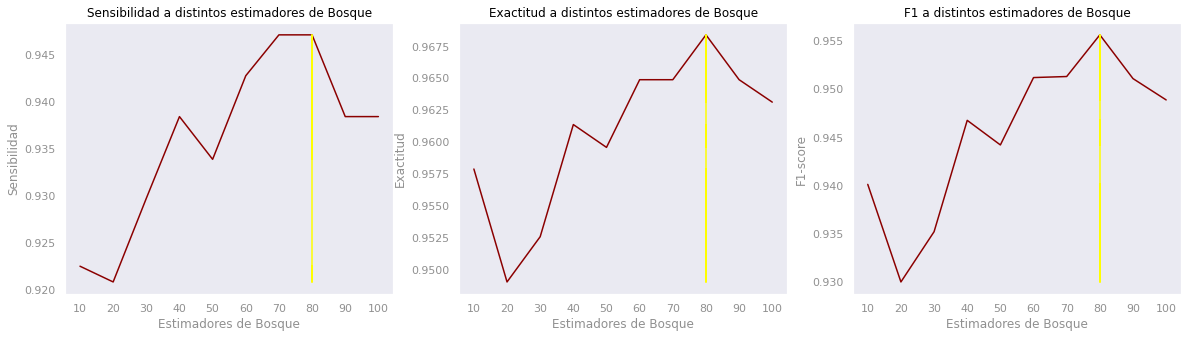

In [ ]:
#VALIDACIÓN CRUZADA PARA VARIAS CANTIDADES DE ESTIMADORES

# PRUEBA DE ESTIMADORES DE BOSQUE
estimadorMinimo = 10
estimadorMaximo = 110
estimadorPaso = 10

recallList = []
ACCList = []
F1List = []

estimadores = np.array(range(estimadorMinimo,estimadorMaximo,estimadorPaso))

for estimador in range(estimadorMinimo,estimadorMaximo,estimadorPaso):
  model_RFT_FIRF = RandomForestClassifier(criterion = 'gini', n_estimators = estimador, random_state = 1, n_jobs = 2)
  model_RFT_FIRF.fit(X_trainT_FIRF, y_trainT_FIRF)

  #CREAR LOS DISTINTOS SUBCONJUNTOS DE ENTRENAMIENTO Y TESTING
  cv = KFold(n_splits = 10, shuffle = True, random_state = 1)
  scores = cross_val_score(model_RFT_FIRF, X_FIRF, y_FIRF, scoring = "recall", cv = cv, n_jobs = 2)
  scoresACC = cross_val_score(model_RFT_FIRF, X_FIRF, y_FIRF, scoring = "accuracy", cv = cv, n_jobs = 2)
  scoresF1 = cross_val_score(model_RFT_FIRF, X_FIRF, y_FIRF, scoring = "f1", cv = cv, n_jobs = 2)

  recallList.append(np.mean(scores))
  ACCList.append(np.mean(scoresACC))
  F1List.append(np.mean(scoresF1))

  print("Para una cantidad de estimadores de ", str(estimador), " sensibilidad:", np.mean(scores), ", exactitud: ", np.mean(scoresACC), ", F1_score: ", np.mean(scoresF1))

recall = np.array(recallList)
ACC = np.array(ACCList)
F1 = np.array(F1List)

fig, axs = plt.subplots(1,3,figsize = (20,5))
axs[0].plot(estimadores, recall, c = "darkred")
axs[0].plot(80*np.ones_like(recall),recall, c = "yellow")
axs[0].set_title("Sensibilidad a distintos estimadores de Bosque")
axs[0].set_xlabel("Estimadores de Bosque")
axs[0].set_ylabel("Sensibilidad")
axs[0].set_xticks(estimadores)
axs[0].grid()

axs[1].plot(estimadores, ACC, c = "darkred")
axs[1].plot(80*np.ones_like(ACC),ACC, c = "yellow")
axs[1].set_title("Exactitud a distintos estimadores de Bosque")
axs[1].set_xlabel("Estimadores de Bosque")
axs[1].set_ylabel("Exactitud")
axs[1].set_xticks(estimadores)
axs[1].grid()

axs[2].plot(estimadores, F1, c = "darkred")
axs[2].plot(80*np.ones_like(F1),F1, c = "yellow")
axs[2].set_title("F1 a distintos estimadores de Bosque")
axs[2].set_xlabel("Estimadores de Bosque")
axs[2].set_ylabel("F1-score")
axs[2].set_xticks(estimadores)
axs[2].grid()

## <B> ETAPA 8: EVALUACIÓN DEL MODELO DE MACHINE LEARNING CLASIFICADOR </B>

In [ ]:
matrizConfusion = confusion_matrix(y_test_1,clasificacion_predict_test_rf1)
matrizConfusion

array([[69,  3],
       [ 1, 41]])

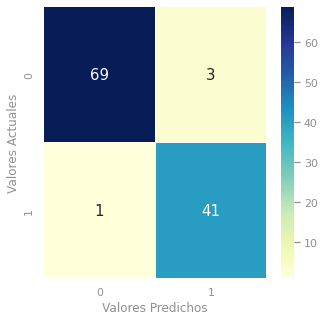

In [ ]:
matrizConfusion = confusion_matrix(y_test_1,clasificacion_predict_test_rf1)

plt.figure(figsize = (5,5))
plt.rcParams['font.size'] = 15

im = sns.heatmap(matrizConfusion, linewidth=0.5, cmap="YlGnBu", annot = True)
im.set_xlabel('Valores Predichos')
im.set_ylabel('Valores Actuales')
plt.show()